In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [37]:
isRun3 = False

#to use both Run1 and Run3
isCombined = False

noTune = False
MECTune = False


data_uncertainty = True


#ending = "Jan19b"
#ending_nob = "Jan19"


#NUE PRE PLOTS
#ending = "Jan19b_NoCut"
#ending_nob = "Jan19_NoCut"
ending = "Jan19b_PreCuts"
ending_nob = "Jan19_PreCuts"

#NUMU PRE PLOTS
#ending = "Jan19b_NoCut"
#ending_nob = "Jan19_NoCut"
#ending = "Jan19b_TriggerCut"
#ending_nob = "Jan19_TriggerCut"
#ending = "Jan19b_VtxXCut"
#ending_nob = "Jan19_VtxXCut"
#ending = "Jan19b_VtxYCut"
#ending_nob = "Jan19_VtxYCut"
#ending = "Jan19b_VtxZCut"
#ending_nob = "Jan19_VtxZCut"
#ending = "Jan19b_MuonCut"
#ending_nob = "Jan19_MuonCut"
#ending = "Jan19b_ProtonCut"
#ending_nob = "Jan19_ProtonCut"
#ending = "Jan19b_ShowerCut"
#ending_nob = "Jan19_ShowerCut"
#ending = "Jan19b_FracCut"
#ending_nob = "Jan19_FracCut"
#ending = "Jan19b_TopoCut"
#ending_nob = "Jan19_TopoCut"

In [38]:
if isRun3 == False and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    #print(nue_nue_allsel_vars_tot)
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")
    

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    #print(nue_dirt_vars_tot)

    ###############################################################
    print(ending)
    print(ending_nob)
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    print(nue_ext_vars_tot)
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    #print(nue_data_vars_tot)

    ###############################################################
    """
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
        
        
    ###############################################################

    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i) 
    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    """
elif isRun3 == True and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
        
        
    ###############################################################

    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i)
    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isCombined == True:
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run1 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run1 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_weights_tot_run1[c][0]) > 2:
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][1:]
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][:-1]
            nue_nue_allsel_weights_tot_run1[c][0] = list(map(float,nue_nue_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_vars_tot_run1[c][0]) > 2:
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][1:]
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][:-1]
            nue_nue_allsel_vars_tot_run1[c][0] = list(map(float,nue_nue_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run1.pop(i)
        nue_nue_allsel_weights_tot_run1.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run1 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run1 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run1.pop("Unnamed: 0")
    nue_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_weights_tot_run1[c][0]) > 2:
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][1:]
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][:-1]
            nue_mc_weights_tot_run1[c][0] = list(map(float,nue_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_vars_tot_run1[c][0]) > 2:
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][1:]
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][:-1]
            nue_mc_vars_tot_run1[c][0] = list(map(float,nue_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run1.pop(i)
        nue_mc_weights_tot_run1.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run1 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run1= nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run1.pop("Unnamed: 0")
    nue_dirt_weights_tot_run1.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_weights_tot_run1[c][0]) > 2:
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][1:]
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][:-1]
            nue_dirt_weights_tot_run1[c][0] = list(map(float,nue_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_vars_tot_run1[c][0]) > 2:
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][1:]
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][:-1]
            nue_dirt_vars_tot_run1[c][0] = list(map(float,nue_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run1.pop(i)
        nue_dirt_weights_tot_run1.pop(i)

    #print(nue_dirt_vars_tot_run1)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run1 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run1 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run1.pop("Unnamed: 0")
    nue_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run1 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run1 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run1.pop("Unnamed: 0")
    nue_data_weights_tot_run1.pop("Unnamed: 0")
    

    ###############################################################
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run1 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run1 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_weights_tot_run1[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][1:]
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][:-1]
            nue_nue_sigsel_weights_tot_run1[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_vars_tot_run1[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][1:]
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][:-1]
            nue_nue_sigsel_vars_tot_run1[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run1.pop(i)
        nue_nue_sigsel_weights_tot_run1.pop(i)
     
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run1 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run1 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_weights_tot_run1[c][0]) > 2:
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][1:]
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][:-1]
            numu_mc_allsel_weights_tot_run1[c][0] = list(map(float,numu_mc_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_vars_tot_run1[c][0]) > 2:
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][1:]
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][:-1]
            numu_mc_allsel_vars_tot_run1[c][0] = list(map(float,numu_mc_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run1.pop(i)
        numu_mc_allsel_weights_tot_run1.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run1 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run1 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_weights_tot_run1[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][1:]
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][:-1]
            numu_mc_sigsel_weights_tot_run1[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_vars_tot_run1[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][1:]
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][:-1]
            numu_mc_sigsel_vars_tot_run1[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run1.pop(i)
        numu_mc_sigsel_weights_tot_run1.pop(i)
    
    ###########################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run1 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run1 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run1.pop("Unnamed: 0")
    numu_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_weights_tot_run1[c][0]) > 2:
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][1:]
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][:-1]
            numu_nue_weights_tot_run1[c][0] = list(map(float,numu_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_vars_tot_run1[c][0]) > 2:
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][1:]
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][:-1]
            numu_nue_vars_tot_run1[c][0] = list(map(float,numu_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run1.pop(i)
        numu_nue_weights_tot_run1.pop(i) 
        

    ###############################################################
    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run1 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run1 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run1.pop("Unnamed: 0")
    numu_dirt_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_weights_tot_run1[c][0]) > 2:
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][1:]
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][:-1]
            numu_dirt_weights_tot_run1[c][0] = list(map(float,numu_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_vars_tot_run1[c][0]) > 2:
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][1:]
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][:-1]
            numu_dirt_vars_tot_run1[c][0] = list(map(float,numu_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run1.pop(i)
        numu_dirt_weights_tot_run1.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run1 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run1 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run1.pop("Unnamed: 0")
    numu_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending_nob+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run1 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run1 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run1.pop("Unnamed: 0")
    numu_data_weights_tot_run1.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
    
    #########################################################################################
    #########################################################################################
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run3 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run3 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_weights_tot_run3[c][0]) > 2:
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][1:]
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][:-1]
            nue_nue_allsel_weights_tot_run3[c][0] = list(map(float,nue_nue_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_vars_tot_run3[c][0]) > 2:
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][1:]
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][:-1]
            nue_nue_allsel_vars_tot_run3[c][0] = list(map(float,nue_nue_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run3.pop(i)
        nue_nue_allsel_weights_tot_run3.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run3 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run3 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run3.pop("Unnamed: 0")
    nue_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_weights_tot_run3[c][0]) > 2:
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][1:]
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][:-1]
            nue_mc_weights_tot_run3[c][0] = list(map(float,nue_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_vars_tot_run3[c][0]) > 2:
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][1:]
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][:-1]
            nue_mc_vars_tot_run3[c][0] = list(map(float,nue_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run3.pop(i)
        nue_mc_weights_tot_run3.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run3 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run3 = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run3.pop("Unnamed: 0")
    nue_dirt_weights_tot_run3.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_weights_tot_run3[c][0]) > 2:
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][1:]
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][:-1]
            nue_dirt_weights_tot_run3[c][0] = list(map(float,nue_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_vars_tot_run3[c][0]) > 2:
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][1:]
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][:-1]
            nue_dirt_vars_tot_run3[c][0] = list(map(float,nue_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run3.pop(i)
        nue_dirt_weights_tot_run3.pop(i)

    #print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run3 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run3 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run3.pop("Unnamed: 0")
    nue_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run3 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run3 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run3.pop("Unnamed: 0")
    nue_data_weights_tot_run3.pop("Unnamed: 0")
    
    
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run3 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run3 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_weights_tot_run3[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][1:]
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][:-1]
            nue_nue_sigsel_weights_tot_run3[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_vars_tot_run3[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][1:]
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][:-1]
            nue_nue_sigsel_vars_tot_run3[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run3.pop(i)
        nue_nue_sigsel_weights_tot_run3.pop(i)
    
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run3 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run3 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_weights_tot_run3[c][0]) > 2:
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][1:]
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][:-1]
            numu_mc_allsel_weights_tot_run3[c][0] = list(map(float,numu_mc_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_vars_tot_run3[c][0]) > 2:
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][1:]
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][:-1]
            numu_mc_allsel_vars_tot_run3[c][0] = list(map(float,numu_mc_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run3.pop(i)
        numu_mc_allsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run3 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run3 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_weights_tot_run3[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][1:]
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][:-1]
            numu_mc_sigsel_weights_tot_run3[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_vars_tot_run3[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][1:]
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][:-1]
            numu_mc_sigsel_vars_tot_run3[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run3.pop(i)
        numu_mc_sigsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run3 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run3 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run3.pop("Unnamed: 0")
    numu_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_weights_tot_run3[c][0]) > 2:
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][1:]
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][:-1]
            numu_nue_weights_tot_run3[c][0] = list(map(float,numu_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_vars_tot_run3[c][0]) > 2:
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][1:]
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][:-1]
            numu_nue_vars_tot_run3[c][0] = list(map(float,numu_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run3.pop(i)
        numu_nue_weights_tot_run3.pop(i) 
        


    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run3 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run3 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run3.pop("Unnamed: 0")
    numu_dirt_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_weights_tot_run3[c][0]) > 2:
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][1:]
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][:-1]
            numu_dirt_weights_tot_run3[c][0] = list(map(float,numu_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_vars_tot_run3[c][0]) > 2:
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][1:]
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][:-1]
            numu_dirt_vars_tot_run3[c][0] = list(map(float,numu_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run3.pop(i)
        numu_dirt_weights_tot_run3.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run3 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run3 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run3.pop("Unnamed: 0")
    numu_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run3 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run3 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run3.pop("Unnamed: 0")
    numu_data_weights_tot_run3.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
    
    

Jan19b_PreCuts
Jan19_PreCuts
{'Unnamed: 0': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 

In [4]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)


    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)



    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])

    print("numu_nue_stat_errs = ", numu_nue_stat_errs)


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)


    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)


    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])

    print("numu_nue_stat_errs = ", numu_nue_stat_errs)

    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif  isCombined == True:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run1)):
        nue_nue_sigsel_stat_errs_run1[a] = float(nue_nue_sigsel_stat_errs_run1[a][0])

    #print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run1)):
        nue_nue_notsigsel_stat_errs_run1[a] = float(nue_nue_notsigsel_stat_errs_run1[a][0])

    #print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run1)):
        nue_mc_stat_errs_run1[a] = float(nue_mc_stat_errs_run1[a][0])

    #print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run1)):
        nue_dirt_stat_errs_run1[a] = float(nue_dirt_stat_errs_run1[a][0])

    #print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run1)):
        nue_ext_stat_errs_run1[a] = float(nue_ext_stat_errs_run1[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    #print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run1)):
        numu_mc_sigsel_stat_errs_run1[a] = float(numu_mc_sigsel_stat_errs_run1[a][0])

    #print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run1)):
        numu_mc_notsigsel_stat_errs_run1[a] = float(numu_mc_notsigsel_stat_errs_run1[a][0])

    #print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    #with open('numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:  
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run1)):
        numu_nue_stat_errs_run1[a] = float(numu_nue_stat_errs_run1[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run1)):
        numu_dirt_stat_errs_run1[a] = float(numu_dirt_stat_errs_run1[a][0])

    #print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run1)):
        numu_ext_stat_errs_run1[a] = float(numu_ext_stat_errs_run1[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)
##############################################################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run3)):
        nue_nue_sigsel_stat_errs_run3[a] = float(nue_nue_sigsel_stat_errs_run3[a][0])

 
    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run3)):
        nue_nue_notsigsel_stat_errs_run3[a] = float(nue_nue_notsigsel_stat_errs_run3[a][0])

    #print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run3)):
        nue_mc_stat_errs_run3[a] = float(nue_mc_stat_errs_run3[a][0])

    #print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run3)):
        nue_dirt_stat_errs_run3[a] = float(nue_dirt_stat_errs_run3[a][0])

   # print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run3)):
        nue_ext_stat_errs_run3[a] = float(nue_ext_stat_errs_run3[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run3)):
        numu_mc_sigsel_stat_errs_run3[a] = float(numu_mc_sigsel_stat_errs_run3[a][0])

    #print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run3)):
        numu_mc_notsigsel_stat_errs_run3[a] = float(numu_mc_notsigsel_stat_errs_run3[a][0])

    #print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run3)):
        numu_nue_stat_errs_run3[a] = float(numu_nue_stat_errs_run3[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run3)):
        numu_dirt_stat_errs_run3[a] = float(numu_dirt_stat_errs_run3[a][0])

    #print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run3)):
        numu_ext_stat_errs_run3[a] = float(numu_ext_stat_errs_run3[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)

nue_nue_sigsel_stat_errs =  [0.11415294346803365, 0.5363867871755931, 0.24091403255004976, 0.07015360336428196, 0.01672669617529939, 0.008056859451353508]
nue_nue_notsigsel_stat_errs =  [0.05392717701937953, 0.08895699332559945, 0.042038756116805666, 0.02089480520737289, 0.003974522208955032, 0.0030785785936006576]
nue_mc_stat_errs =  [0.3239482733156466, 0.46175321163448074, 0.14679623974429135, 0.06604209702005442, 0.00286207663504955, 0.022358808036470678]
nue_dirt_stat_errs =  [0.004296435854146879, 0.0, 0.0, 0.0, 0.0, 0.0]
nue_ext_stat_errs =  [0.7491386773743691, 0.7491386773743691, 0.0, 0.0, 0.0, 0.0]

numu_mc_sigsel_stat_errs =  [1.1212636559180764, 25.028610166182574, 25.61758451962984, 16.837759643124276, 4.785302908937246, 5.244884478483153]
numu_mc_notsigsel_stat_errs =  [0.1988759752212631, 7.8270141398854225, 8.289851147494828, 3.851197129462874, 1.3979171012217442, 0.7601883662556677]
numu_nue_stat_errs =  [0.00016218441019841831, 0.012818323270081425, 0.0103217469698503

In [5]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.zeros([len(n_tot_pair[0]), len(n_tot_pair[1])])
        for n in n_tot_pair:
            for i in range(len(n_tot_pair[0])):
                for j in range(len(n_tot_pair[1])):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [6]:
if isRun3 == False and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)
    
    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
elif isRun3 == True and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
elif isCombined == True:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run1 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run1 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run1 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run1 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run1 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run1 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run1 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run1 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run1= get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx_run1 = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie_run1 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint_run1 = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo_run1 = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run1 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run1 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run1 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run1 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
#######################################################################################################

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run3 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run3 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run3 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run3 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run3 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run3 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run3 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run3 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx_run3 = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie_run3 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint_run3 = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo_run3 = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending_nob+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run3 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run3 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run3 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run3 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)

In [7]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_ppfx = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_ppfx_vars = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_ppfx_splines = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_reint = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_reint_vars = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_reint_splines = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_geo = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_geo_vars = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_geo_splines = numu_nue_df_geo_splines.set_index('entry')

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)
    
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_ppfx = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_ppfx_vars = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_ppfx_splines = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_reint = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_reint_vars = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_reint_splines = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_geo = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_geo_vars = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_geo_splines = numu_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx_run1 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx_vars_run1 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run1 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_run1 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run1 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run1 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_ppfx_run1 = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_ppfx_vars_run1 = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_ppfx_splines_run1 = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_run1 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run1 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run1 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_genie_run1 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars_run1 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run1 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_run1 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_vars_run1 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_splines_run1 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_run1 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_vars_run1 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_splines_run1 = numu_nue_df_genie_splines.set_index('entry')

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_run1 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_vars_run1 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_splines_run1 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_reint_run1 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run1 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run1 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_run1 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_vars_run1 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_splines_run1 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_reint_run1 = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_reint_vars_run1 = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_reint_splines_run1 = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_run1 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_vars_run1 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_splines_run1 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_geo_run1 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run1 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run1 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_run1 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_vars_run1 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_splines_run1 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_geo_run1 = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_geo_vars_run1 = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_geo_splines_run1 = numu_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_run1 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_vars_run1 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_splines_run1 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

###############################################################################
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx_run3 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars_run3 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run3 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_ppfx_run3 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_ppfx_vars_run3 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_ppfx_splines_run3 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_ppfx_run3 = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_ppfx_vars_run3 = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_ppfx_splines_run3 = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_ppfx_run3 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_ppfx_vars_run3 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_ppfx_splines_run3 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_run3 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_vars_run3 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run3 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_genie_run3 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_genie_vars_run3 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_genie_splines_run3 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_run3 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_vars_run3 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_splines_run3 = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_genie_run3 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_genie_vars_run3 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_genie_splines_run3 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_reint_run3 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run3 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run3 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_reint_run3 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_reint_vars_run3 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_reint_splines_run3 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_reint_run3 = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_reint_vars_run3 = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_reint_splines_run3 = numu_nue_df_reint_splines.set_index('entry')

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_reint_run3 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_reint_vars_run3 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_reint_splines_run3 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_geo_run3 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run3 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run3 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_geo_run3 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_geo_vars_run3 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    nue_dirt_df_geo_splines_run3 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_geo_run3 = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_geo_vars_run3 = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_geo_splines_run3 = numu_nue_df_geo_splines.set_index('entry')

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_geo_run3 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_geo_vars_run3 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending_nob+".csv")

    numu_dirt_df_geo_splines_run3 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

## Plot Nue

['#82a67d', '#b2996e', '#448ee4', '#cc7a8b', '#11875D', '#A285D1', '#D5B60A']
dict_keys(['2', '9', '1', '8', '12', '10', '11'])
[8.51817227e+01 8.06355014e+01 3.06981218e+01 9.53442496e+00
 3.12219375e+00 1.08582466e+00 7.83472287e-01 3.14429943e-01
 8.23510991e-02 1.10617492e-01]


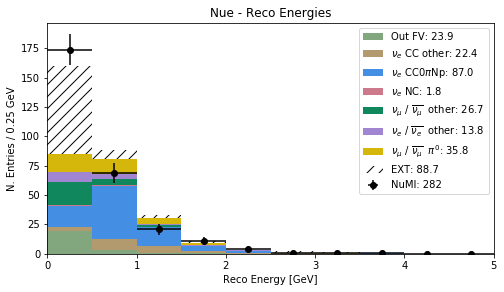

In [39]:
##COMMENT OUT DIRT FOR NUWRO

category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}

########################################
pup = list(nue_nue_allsel_vars_tot.values())

i = 0
for c in nue_nue_allsel_vars_tot.keys():
    nue_nue_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot.values())

i = 0
for c in nue_nue_allsel_weights_tot.keys():
    nue_nue_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot.values())

i = 0
for c in nue_mc_vars_tot.keys():
    nue_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot.values())

i = 0
for c in nue_mc_weights_tot.keys():
    nue_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot.values())

i = 0
for c in nue_dirt_vars_tot.keys():
    nue_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot.values())

i = 0
for c in nue_dirt_weights_tot.keys():
    nue_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot, nue_mc_vars_tot]#, nue_dirt_vars_tot]
weightss = [nue_nue_allsel_weights_tot, nue_mc_weights_tot]#, nue_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
#nue_allsel_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

print(colors)

#VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

print(varss_tot[0].keys())

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])


i = 0
nue_ext_var = []
nue_ext_weight = []

for i in range(len(nue_ext_vars_tot[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot[str(0)][i])
    i=i+1

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_var,
            weights=nue_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(nue_ext_weight) if sum(nue_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

#nue_allsel_ax1.set_xlim([0, 3])    #TrueE, lepton mom
#current_bincenters =  np.arange(0.25, 3.25, 0.5)
#current_bin_size = 0.5


nue_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5

nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

In [9]:
total_nue_selected_noExt_noDirt = n_nue_tot
print("total_nue_selected_noExt_noDirt ", total_nue_selected_noExt_noDirt)

total_nue_selected_noExt_noDirt  [12.15444952 38.36090699 16.17636553  5.38743457  1.70332792  1.37266821]


In [10]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)

    #print(nue_stacked)

    wanted_key = 2

    nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)


    print('%.50f' % math.fsum(nue_wanted_list))

    #nue_wanted_list = n_nue_tot
    #print(nue_wanted_list)
    print("")
    print(sum(current_total_hist))
    #print(sum(sum(n_nue_tot)))

    print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

IndexError: index 6 is out of bounds for axis 0 with size 6

[ 7.54933089 28.90186196 11.869288    3.38853422  1.18822898  0.7600639 ]
53.65730794901261901941325049847364425659179687500000



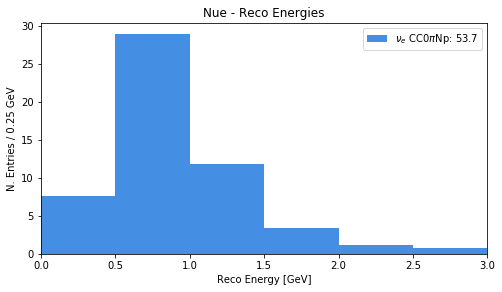

In [11]:

if isCombined == False:

    ########################################
    pup = list(nue_nue_sigsel_vars_tot.values())

    i = 0
    for c in nue_nue_sigsel_vars_tot.keys():
        nue_nue_sigsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_sigsel_weights_tot.values())

    i = 0
    for c in nue_nue_sigsel_weights_tot.keys():
        nue_nue_sigsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1

    varss = [nue_nue_sigsel_vars_tot]
    weightss = [nue_nue_sigsel_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([1, 3])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"

    nue_stacked = nue_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                color = "#448ee4",
                bins=BINS,
                range=RANGE)



    current_total_hist = (nue_stacked[0][-1])

    nue_ax1.set_xlim([0, 3])    #TrueE, lepton mom
    current_bincenters =  np.arange(0.25, 3.25, 0.5)
    #current_bincenters =  np.arange(-0.25, 4.75, 0.5)
    current_bin_size = 0.5
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff
    #current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    #current_bin_size = 0.25

    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]

    n_nue_tot = (nue_stacked[0])
    print(n_nue_tot)
    #n_nue_tot = (nue_stacked[0])
    #print(n_nue_tot)


    #current_total_hist = (nue_stacked[0][-1])
    current_total_hist = (nue_stacked[0])
    print('%.50f' % math.fsum(nue_stacked[0]))
    print()


    #nue_ax1.set_ylim([0, 50])

    plt.title("Nue - Reco Energies")
    plt.xlabel("Reco Energy [GeV]")
    plt.ylabel("N. Entries / 0.25 GeV")
    plt.legend()

    #need to cut data to make it work for shorter plot

In [12]:
if isCombined == False and isRun3 == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')

In [13]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [ 7.54933089 28.90186196 11.869288    3.38853422  1.18822898  0.7600639 ]


In [14]:
cv_nue_bkg_noExt_noDirt = total_nue_selected_noExt_noDirt - signal_nue_selected
print("cv_nue_bkg_noExt_noDirt ", cv_nue_bkg_noExt_noDirt)

print(isRun3)

if isCombined == True:
    np.savetxt("nue_nopions_recoE_usingSelection_comb_cv_nue_bkg_noExt_noDirt_"+ending+".csv", 
               cv_nue_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False:
    np.savetxt("nue_nopions_recoE_usingSelection_run1_cv_nue_bkg_noExt_noDirt_"+ending+".csv", 
               cv_nue_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_recoE_usingSelection_run1_cv_nue_evt_rate_"+ending+".csv", 
               signal_nue_selected,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_recoE_usingSelection_run1_cv_nue_full_evt_rate_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

cv_nue_bkg_noExt_noDirt  [4.60511863 9.45904503 4.30707752 1.99890035 0.51509894 0.61260431]
False


Sidenote for unfolding

In [15]:
#Data values
data_values = list(nue_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = nue_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

#print(nue_wanted_list[1:7])

[12 29  9  5  3  1]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


NameError: name 'nue_wanted_list' is not defined

In [16]:
if isRun3 == False:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')
elif isRun3 == True:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_run3_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

## Now do Numu

dict_values([13, 272, 203, 97, 51, 28])
<class 'dict_values'>
[ 10.0996287  235.40844664 225.76474931 109.81186657  40.89493032
  30.53642881]


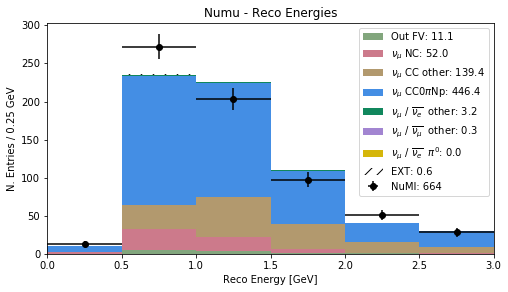

In [17]:
##COMMENT OUT DIRT FOR NUWRO

category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


############################################# 
pup = list(numu_mc_allsel_vars_tot.values())

i = 0
for c in numu_mc_allsel_vars_tot.keys():
    numu_mc_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_allsel_weights_tot.values())

i = 0
for c in numu_mc_allsel_weights_tot.keys():
    numu_mc_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
    
############################################# 
pup = list(numu_nue_vars_tot.values())

i = 0
for c in numu_nue_vars_tot.keys():
    numu_nue_vars_tot[str(c)] = pup[i][0]
    i = i + 1

pup2 = list(numu_nue_weights_tot.values())

i = 0
for c in numu_nue_weights_tot.keys():
    numu_nue_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
            
############################################# 
pup = list(numu_dirt_vars_tot.values())

i = 0
for c in numu_dirt_vars_tot.keys():
    numu_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot.values())

i = 0
for c in numu_dirt_weights_tot.keys():
    numu_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_allsel_vars_tot, numu_nue_vars_tot]#, numu_dirt_vars_tot]
weightss = [numu_mc_allsel_weights_tot, numu_nue_weights_tot]#, numu_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
#numu_allsel_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

i = 0
numu_ext_var = []
numu_ext_weight = []

for i in range(len(numu_ext_vars_tot[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot[str(0)][i])
    i=i+1

n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_var,
            weights=numu_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(numu_ext_weight) if sum(numu_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_allsel_ax1.set_xlim([0, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 3.25, 0.5)
current_bin_size = 0.5

print(numu_data_vars_tot[str(0)].values())
print(type(numu_data_vars_tot[str(0)].values()))

numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=numu_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot

#numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [18]:
#total_numu_selected_noExt = n_numu_tot
#print("total_numu_selected_noExt ", total_numu_selected_noExt)
total_numu_selected_noExt_noDirt = n_numu_tot
print("total_numu_selected_noExt_noDirt ", total_numu_selected_noExt_noDirt)

total_numu_selected_noExt_noDirt  [ 10.0996287  235.40844664 225.76474931 109.81186657  40.89493032
  30.53642881]


In [19]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


wanted_key = 3

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

#numu_wanted_list = n_numu_tot

IndexError: index 6 is out of bounds for axis 0 with size 6

[  7.73106306 170.14026152 150.59889519  70.6779897   25.47887702
  21.81945027]


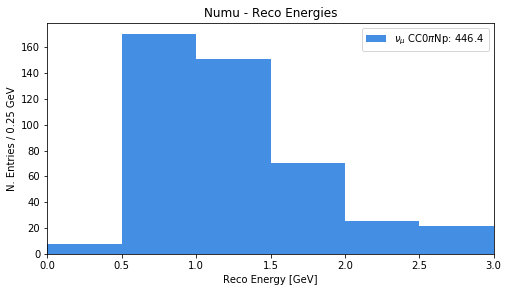

In [20]:



############################################# 
pup = list(numu_mc_sigsel_vars_tot.values())

i = 0
for c in numu_mc_sigsel_vars_tot.keys():
    numu_mc_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot.values())

i = 0
for c in numu_mc_sigsel_weights_tot.keys():
    numu_mc_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
    
varss = [numu_mc_sigsel_vars_tot]
weightss = [numu_mc_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
#numu_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0])


numu_ax1.set_xlim([0, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 3.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25


#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0])
print(n_numu_tot)

#numu_ax1.set_ylim([0, 950])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [21]:
if isCombined == False and isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

In [22]:
signal_numu_selected = current_total_hist
print("signal_nue_selected ", signal_numu_selected)

signal_nue_selected  [  7.73106306 170.14026152 150.59889519  70.6779897   25.47887702
  21.81945027]


In [23]:
cv_numu_bkg_noExt_noDirt = total_numu_selected_noExt_noDirt - signal_numu_selected
print("cv_numu_bkg_noExt_noDirt ", cv_numu_bkg_noExt_noDirt)


if isCombined == False and isRun3 == False:
    np.savetxt("numu_nopions_recoE_usingSelection_run1_cv_numu_bkg_noExt_noDirt_"+ending+".csv", 
               cv_numu_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_recoE_usingSelection_run1_cv_numu_evt_rate_"+ending+".csv", 
               signal_numu_selected,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_recoE_usingSelection_run1_cv_numu_full_evt_rate_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s') 

cv_numu_bkg_noExt_noDirt  [ 2.36856564 65.26818511 75.16585412 39.13387687 15.4160533   8.71697854]


Sidenote for unfolding

In [24]:
#Data values
data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = numu_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[ 13 272 203  97  51  28]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


NameError: name 'numu_wanted_list' is not defined

In [25]:
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_run3_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

### Combined Plots

Nue Combined Plots

[3.65531422e+05 1.61735580e+04 5.06203311e+03 1.71519653e+03
 6.12447080e+02 2.60460763e+02]
total including ext =  [1.85575536e+06 2.41535201e+04 5.86518607e+03 1.92213836e+03
 7.12900884e+02 3.11390404e+02]


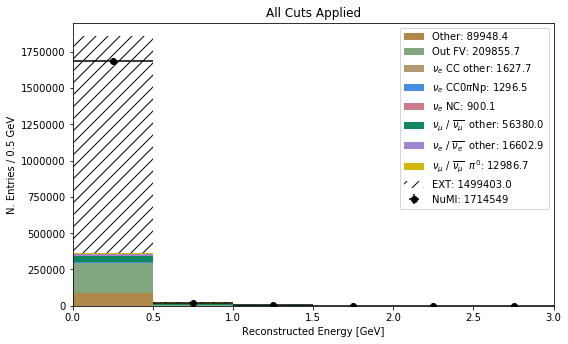

In [29]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Other'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


########################################
pup = list(nue_nue_allsel_vars_tot_run1.values())

i = 0
for c in nue_nue_allsel_vars_tot_run1.keys():
    nue_nue_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run1.values())

i = 0
for c in nue_nue_allsel_weights_tot_run1.keys():
    nue_nue_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run1.values())

i = 0
for c in nue_mc_vars_tot_run1.keys():
    nue_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run1.values())

i = 0
for c in nue_mc_weights_tot_run1.keys():
    nue_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run1.values())

i = 0
for c in nue_dirt_vars_tot_run1.keys():
    nue_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run1.values())

i = 0
for c in nue_dirt_weights_tot_run1.keys():
    nue_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
########################################
pup = list(nue_nue_allsel_vars_tot_run3.values())

i = 0
for c in nue_nue_allsel_vars_tot_run3.keys():
    nue_nue_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run3.values())

i = 0
for c in nue_nue_allsel_weights_tot_run3.keys():
    nue_nue_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run3.values())

i = 0
for c in nue_mc_vars_tot_run3.keys():
    nue_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run3.values())

i = 0
for c in nue_mc_weights_tot_run3.keys():
    nue_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run3.values())

i = 0
for c in nue_dirt_vars_tot_run3.keys():
    nue_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run3.values())

i = 0
for c in nue_dirt_weights_tot_run3.keys():
    nue_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot_run1, nue_mc_vars_tot_run1, nue_dirt_vars_tot_run1, nue_nue_allsel_vars_tot_run3, nue_mc_vars_tot_run3, nue_dirt_vars_tot_run3]
weightss = [nue_nue_allsel_weights_tot_run1, nue_mc_weights_tot_run1, nue_dirt_weights_tot_run1, nue_nue_allsel_weights_tot_run3, nue_mc_weights_tot_run3, nue_dirt_weights_tot_run3]
#varss = [nue_nue_allsel_vars_tot_run3]
#weightss = [nue_nue_allsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])

#NoCut, PreCuts
#nue_allsel_ax1.set_xlim([0, 5])
#AllCuts


labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

#VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]" #NoCut, PreCuts
VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"



nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

i = 0
nue_ext_var = []
nue_ext_weight = []

for i in range(len(nue_ext_vars_tot_run1[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run1[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(nue_ext_vars_tot_run3[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run3[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run3[str(0)][i])
    i=i+1  

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_var,
            weights=nue_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(nue_ext_weight) if sum(nue_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


#NoCut, PreCuts
#nue_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
#current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bin_size = 0.5
#Allcuts
nue_allsel_ax1.set_xlim([0, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 3.25, 0.5)
current_bin_size = 0.5


i = 0
nue_data_var = []
nue_data_weight = []

#while i < 10:  ###NoCut, PreCuts
while i < 6:  ###AllCuts 
    nue_data_var.append(nue_data_vars_tot_run1[str(0)][i] + nue_data_vars_tot_run3[str(0)][i])
    nue_data_weight.append(nue_data_weights_tot_run1[str(0)][i] + nue_data_weights_tot_run3[str(0)][i])
    i=i+1


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_var,
            xerr=current_bin_size/2,
            yerr=nue_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_var) if (nue_data_var) else "")


n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot + n_ext
#n_nue_tot = (nue_stacked[0])
print("total including ext = ", n_nue_tot_allsel)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])

#nue_allsel_ax1.set_yscale('log')
#nue_allsel_ax1.set_ylim([0, 50])

plt.title("All Cuts Applied")
plt.xlabel("Reconstructed Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()
plt.tight_layout()

In [9]:
nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_comb_"+ending+".svg",bbox_inches='tight' )

In [10]:
total_nocuts = [1.85575536e+06, 2.41535201e+04, 5.86518607e+03, 1.92213836e+03,
 7.12900884e+02, 3.11390404e+02, 1.30998813e+02, 6.05615459e+01,
 3.28202495e+01, 5.59986953e+01]

In [11]:
total_nue_selected = n_nue_tot_allsel
print("total_nue_selected ", total_nue_selected)

total_nue_selected_noExt = n_nue_tot
print("total_nue_selected_noExt ", total_nue_selected_noExt)

total_nue_selected  [ 41.51690353 115.10355622  49.20163989  18.40955142   6.3825831
   6.30561557]
total_nue_selected_noExt  [ 38.79332133 112.37997402  49.20163989  18.40955142   6.3825831
   6.30561557]


155.26288495065324468669132329523563385009765625000000



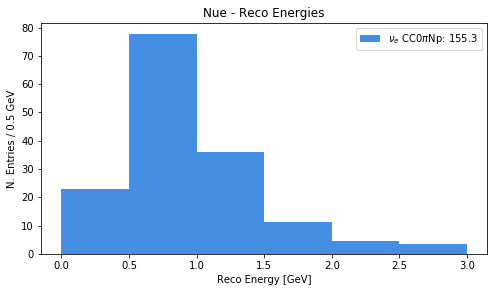

In [12]:



########################################
pup = list(nue_nue_sigsel_vars_tot_run1.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run1.keys():
    nue_nue_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run1.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run1.keys():
    nue_nue_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(nue_nue_sigsel_vars_tot_run3.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run3.keys():
    nue_nue_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run3.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run3.keys():
    nue_nue_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [nue_nue_sigsel_vars_tot_run1, nue_nue_sigsel_vars_tot_run3]
weightss = [nue_nue_sigsel_weights_tot_run1, nue_nue_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#For NoCut, PreCuts
#nue_ax1.set_xlim([0, 5])


labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

#For NoCuts, PreCuts
#VARIABLE, BINS, RANGE, XTIT = 'reco_e', 10,(0.0, 5.0),"Reco Energy [GeV]"
#Allcuts
VARIABLE, BINS, RANGE, XTIT = 'reco_e', 6,(0.0, 3.0),"Reco Energy [GeV]"


#print(varss_tot[0])

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])


n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [13]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [22.75025931 77.65268931 35.89616102 11.09976876  4.46142678  3.40257977]


In [14]:
signal_nocuts = [639.66568654, 365.28351486, 167.39949208,  63.94179659,  30.57853824,
  14.27517069,   7.14667514 ,  3.96320312,   1.74464611,   2.54532736]

In [15]:
#######Overall purity and efficiency from cut


overall_eff = np.sum(signal_nue_selected)/np.sum(signal_nocuts)
print("Efficiency = ", overall_eff*100, "%")


overall_pur = np.sum(signal_nue_selected)/np.sum(n_nue_tot_allsel)
print("Purity = ", overall_pur*100, "%")

Efficiency =  11.975133807697064 %
Purity =  65.53392850823305 %


In [16]:
cv_nue_bkg_noExt = total_nue_selected_noExt - signal_nue_selected
print("cv_nue_bkg_noExt ", cv_nue_bkg_noExt)

cv_nue_bkg_incExt = total_nue_selected - signal_nue_selected
print("cv_nue_bkg_incExt ", cv_nue_bkg_incExt)

if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("nue_nopions_energy_usingSelection_comb_cv_nue_bkg_noExt_"+ending+".csv", 
               cv_nue_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_energy_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", 
               cv_nue_bkg_incExt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False and noTune == False and MECTune == False:
    np.savetxt("nue_nopions_energy_usingSelection_run1_cv_nue_bkg_noExt_"+ending+".csv", 
               cv_nue_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')

cv_nue_bkg_noExt  [16.04306203 34.72728471 13.30547888  7.30978266  1.92115632  2.9030358 ]
cv_nue_bkg_incExt  [18.76664423 37.45086691 13.30547888  7.30978266  1.92115632  2.9030358 ]


In [17]:
#Data values
#data_values = list(nue_data_var[str(0)].values())
data_values = np.array(nue_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot_run1[str(0)][0] + nue_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*6
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_nue_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg


[ 62 104  35  13   6   2]
[0.87011925 0.         0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0.]


In [18]:
if isCombined == True:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

Numu Combined Plots

{'0': {0: 13, 1: 272, 2: 203, 3: 97, 4: 51, 5: 28}}
[ 32.59219886 783.78661058 793.4029314  375.97835677 142.13809023
  95.75469471]
[ 34.64134785 835.78205714 817.4622734  377.7752075  143.31711997
  96.06360521]


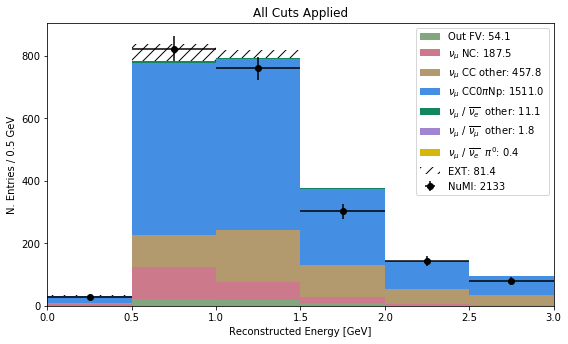

In [19]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Other'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


############################################# 
pup = list(numu_mc_allsel_vars_tot_run1.values())

i = 0
for c in numu_mc_allsel_vars_tot_run1.keys():
    numu_mc_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run1.values())

i = 0
for c in numu_mc_allsel_weights_tot_run1.keys():
    numu_mc_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run1.values())

i = 0
for c in numu_nue_vars_tot_run1.keys():
    numu_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run1.values())

i = 0
for c in numu_nue_weights_tot_run1.keys():
    numu_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run1.values())

i = 0
for c in numu_dirt_vars_tot_run1.keys():
    numu_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_dirt_weights_tot_run1.values())

i = 0
for c in numu_dirt_weights_tot_run1.keys():
    numu_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_allsel_vars_tot_run3.values())

i = 0
for c in numu_mc_allsel_vars_tot_run3.keys():
    numu_mc_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run3.values())

i = 0
for c in numu_mc_allsel_weights_tot_run3.keys():
    numu_mc_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run3.values())

i = 0
for c in numu_nue_vars_tot_run3.keys():
    numu_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run3.values())

i = 0
for c in numu_nue_weights_tot_run3.keys():
    numu_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run3.values())

i = 0
for c in numu_dirt_vars_tot_run3.keys():
    numu_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_run3.values())

i = 0
for c in numu_dirt_weights_tot_run3.keys():
    numu_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if (key in dict_1) and (key in dict_2):
            dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    

varss = [numu_mc_allsel_vars_tot_run1, numu_nue_vars_tot_run1, numu_dirt_vars_tot_run1, numu_mc_allsel_vars_tot_run3, numu_nue_vars_tot_run3, numu_dirt_vars_tot_run3]
weightss = [numu_mc_allsel_weights_tot_run1, numu_nue_weights_tot_run1, numu_dirt_weights_tot_run1, numu_mc_allsel_weights_tot_run3, numu_nue_weights_tot_run3, numu_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
#numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

#VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"  #for nocuts, pre cuts
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]" #VtxX
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"  #VtxY
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"   #VtxZ
#VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"  #Muons
#VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',8,(0, 8),"Number of Protons"   #Protons
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(0, 10),"Number of Contained Showers"  #Showers
#VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"   #Cont Frac
#VARIABLE, BINS, RANGE, XTIT = 'topological_score',10,(0.0, 1.0),"Topological Score"  #Topo score

VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"  #for nocuts, pre cuts


numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])
#print(current_total_hist)

i = 0
numu_ext_var = []
numu_ext_weight = []

for i in range(len(numu_ext_vars_tot_run1[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run1[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(numu_ext_vars_tot_run3[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run3[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run3[str(0)][i])
    i=i+1    


n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_var,
            weights=numu_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(numu_ext_weight) if sum(numu_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


#numu_allsel_ax1.set_xlim([0, 5])    #nocuts, precuts
#current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bin_size = 0.5
######################
#numu_allsel_ax1.set_xlim([-20, 280])    #VtxX
#current_bincenters =  np.arange(-17.5, 282.5, 5)
#current_bin_size = 5
######################
#numu_allsel_ax1.set_xlim([-140, 140])    #VtxY
#current_bincenters =  np.arange(-137.5, 142.5, 5)
#current_bin_size = 5
######################
#numu_allsel_ax1.set_xlim([-10, 1110])    #VtxZ
#current_bincenters =  np.arange(0, 1120, 20)
#current_bin_size = 20
######################
#numu_allsel_ax1.set_xlim([0, 5])    #Muons
#current_bincenters =  np.arange(0.5, 5.5, 1)
#current_bin_size = 1
######################
#numu_allsel_ax1.set_xlim([0, 8])    #Protons
#current_bincenters =  np.arange(0.5, 8.5, 1)
#current_bin_size = 1
######################
#numu_allsel_ax1.set_xlim([0, 10])    #Showers
#current_bincenters =  np.arange(0.5, 10.5, 1)
#current_bin_size = 1
######################
#numu_allsel_ax1.set_xlim([0, 1])    #Contained
#current_bincenters =  np.arange(0.025, 1.025, 0.05)
#current_bin_size = 0.05
######################
#numu_allsel_ax1.set_xlim([0, 1])    #Topo
#current_bincenters =  np.arange(0.05, 1.05, 0.1)
#current_bin_size = 0.1

numu_allsel_ax1.set_xlim([0, 3])    
current_bincenters =  np.arange(0.25, 3.25, 0.5)
current_bin_size = 0.5

i = 0
numu_data_var = []
numu_data_weight = []

print(numu_data_vars_tot_run1)

#while i < 10: #NoCuts, PreCuts
#while i < 60:   #VtxX
#while i < 56:   #VtxY, Z  
#while i < 5:   #Muons
#while i < 8:   #Protons 
#while i < 10:   #Showers 
#while i < 20:   #Contained
#while i < 10:   #Topo 
while i < 6:   
    numu_data_var.append(numu_data_vars_tot_run1[str(0)][i] + numu_data_vars_tot_run3[str(0)][i])
    numu_data_weight.append(numu_data_weights_tot_run1[str(0)][i] + numu_data_weights_tot_run3[str(0)][i])
    i=i+1


numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_var,
            xerr=current_bin_size/2,
            yerr=numu_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_var) if sum(numu_data_var) else "")


n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot + n_ext
print(n_numu_tot_allsel)

#numu_allsel_ax1.set_ylim([0, 1150])
#numu_allsel_ax1.set_yscale('log')

plt.title("All Cuts Applied")
plt.xlabel("Reconstructed Energy [GeV]")
#plt.xlabel("Topological Score")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()
plt.tight_layout()

In [20]:
numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_comb_"+ending+".svg",bbox_inches='tight' )

In [21]:
total_nocuts = [1.84271348e+06, 2.96653972e+04, 1.16371507e+04, 3.23983097e+03,
 1.08394976e+03, 4.46961634e+02, 1.70441903e+02, 5.98003304e+01,
 2.07583165e+01, 3.75572161e+01]

In [22]:
total_numu_selected = n_numu_tot_allsel
print("total_numu_selected ", total_numu_selected)

total_numu_selected_noExt = n_numu_tot
print("total_numu_selected_noExt ", total_numu_selected_noExt)

total_numu_selected  [ 34.64134785 835.78205714 817.4622734  377.7752075  143.31711997
  96.06360521]
total_numu_selected_noExt  [ 32.59219886 783.78661058 793.4029314  375.97835677 142.13809023
  95.75469471]


[ 22.82507154 550.18097095 547.82544905 242.73677535  87.59627616
  59.84530923]
1511.00985227680416755902115255594253540039062500000000



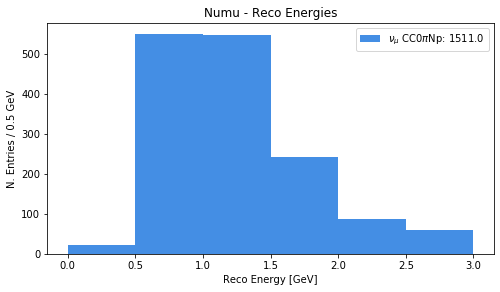

In [23]:



########################################
pup = list(numu_mc_sigsel_vars_tot_run1.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run1.keys():
    numu_mc_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run1.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run1.keys():
    numu_mc_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(numu_mc_sigsel_vars_tot_run3.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run3.keys():
    numu_mc_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run3.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run3.keys():
    numu_mc_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [numu_mc_sigsel_vars_tot_run1, numu_mc_sigsel_vars_tot_run3]
weightss = [numu_mc_sigsel_weights_tot_run1, numu_mc_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
#numu_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

#VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]" #NoCuts, PreCuts
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]" #VtxX
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"  #VtxY
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"   #VtxZ
#VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"  #Muons
#VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',8,(0, 8),"Number of Protons"   #Protons
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(0, 10),"Number of Contained Showers"  #Showers
#VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"   #Cont Frac
#VARIABLE, BINS, RANGE, XTIT = 'topological_score',10,(0.0, 1.0),"Topological Score"  #Topo score

VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]" #NoCuts, PreCuts



numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])


n_numu_tot = (numu_stacked[0])
print(n_numu_tot)


current_total_hist = (numu_stacked[0])
print('%.50f' % math.fsum(numu_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [24]:
signal_numu_selected = current_total_hist
print("signal_numu_selected ", signal_numu_selected)

signal_numu_selected  [ 22.82507154 550.18097095 547.82544905 242.73677535  87.59627616
  59.84530923]


In [25]:
signal_nocuts = [1.88686019e+04, 5.58721968e+03, 2.02998074e+03, 6.77589773e+02,
 2.61033941e+02, 1.19676755e+02, 4.74482180e+01, 1.03032093e+01,
 3.15042161e+00, 1.79212616e+00]

In [26]:
#######Overall purity and efficiency from cut


overall_eff = np.sum(signal_numu_selected)/np.sum(signal_nocuts)
print("Efficiency = ", overall_eff*100, "%")


overall_pur = np.sum(signal_numu_selected)/np.sum(n_numu_tot_allsel)
print("Purity = ", overall_pur*100, "%")

Efficiency =  5.4733255190380135 %
Purity =  65.55238938094446 %


In [27]:
cv_numu_bkg_noExt = total_numu_selected_noExt - signal_numu_selected
print("cv_numu_bkg_noExt ", cv_numu_bkg_noExt)

cv_numu_bkg_incExt = total_numu_selected - signal_numu_selected
print("cv_numu_bkg_incExt ", cv_numu_bkg_incExt)

if isCombined == True:
    np.savetxt("numu_nopions_energy_usingSelection_comb_cv_numu_bkg_noExt_"+ending+".csv", 
               cv_numu_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_energy_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", 
               cv_numu_bkg_incExt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False:
    np.savetxt("numu_nopions_energy_usingSelection_run1_cv_numu_bkg_noExt_"+ending+".csv", 
               cv_numu_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')

cv_numu_bkg_noExt  [  9.76712732 233.60563963 245.57748235 133.24158142  54.54181407
  35.90938549]
cv_numu_bkg_incExt  [ 11.81627631 285.60108619 269.63682435 135.03843215  55.72084381
  36.21829598]


In [28]:
#Data values
#data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(numu_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot_run1[str(0)][0] + numu_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*6
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_numu_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[ 27 822 759 302 143  80]
[0.87011925 0.         0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0.]


In [29]:
if isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

## Ratio Plot

Meaningless before unfolding, so don't bother

## Errors

### Get stat errs

In [30]:
if isCombined == False:
    nue_nue_sigsel_stat_errs = np.array(nue_nue_sigsel_stat_errs)
    nue_nue_notsigsel_stat_errs = np.array(nue_nue_notsigsel_stat_errs)
    nue_mc_stat_errs = np.array(nue_mc_stat_errs)
    nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)
    nue_ext_stat_errs = np.array(nue_ext_stat_errs)

    numu_mc_sigsel_stat_errs = np.array(numu_mc_sigsel_stat_errs)
    numu_mc_notsigsel_stat_errs = np.array(numu_mc_notsigsel_stat_errs)
    numu_nue_stat_errs = np.array(numu_nue_stat_errs)
    numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)
    numu_ext_stat_errs = np.array(numu_ext_stat_errs)


    #numu_detsys_errs = np.array(numu_detsys_errs)
elif isCombined == True:
    nue_nue_sigsel_stat_errs_run1 = np.array(nue_nue_sigsel_stat_errs_run1)
    nue_nue_notsigsel_stat_errs_run1 = np.array(nue_nue_notsigsel_stat_errs_run1)
    nue_mc_stat_errs_run1 = np.array(nue_mc_stat_errs_run1)
    nue_dirt_stat_errs_run1= np.array(nue_dirt_stat_errs_run1)
    nue_ext_stat_errs_run1 = np.array(nue_ext_stat_errs_run1)

    numu_mc_sigsel_stat_errs_run1 = np.array(numu_mc_sigsel_stat_errs_run1)
    numu_mc_notsigsel_stat_errs_run1 = np.array(numu_mc_notsigsel_stat_errs_run1)
    numu_nue_stat_errs_run1 = np.array(numu_nue_stat_errs_run1)
    numu_dirt_stat_errs_run1 = np.array(numu_dirt_stat_errs_run1)
    numu_ext_stat_errs_run1 = np.array(numu_ext_stat_errs_run1)


    #numu_detsys_errs = np.array(numu_detsys_errs)
    ###########################################
    nue_nue_sigsel_stat_errs_run3 = np.array(nue_nue_sigsel_stat_errs_run3)
    nue_nue_notsigsel_stat_errs_run3 = np.array(nue_nue_notsigsel_stat_errs_run3)
    nue_mc_stat_errs_run3 = np.array(nue_mc_stat_errs_run3)
    nue_dirt_stat_errs_run3 = np.array(nue_dirt_stat_errs_run3)
    nue_ext_stat_errs_run3 = np.array(nue_ext_stat_errs_run3)

    numu_mc_sigsel_stat_errs_run3 = np.array(numu_mc_sigsel_stat_errs_run3)
    numu_mc_notsigsel_stat_errs_run3 = np.array(numu_mc_notsigsel_stat_errs_run3)
    numu_nue_stat_errs_run3 = np.array(numu_nue_stat_errs_run3)
    numu_dirt_stat_errs_run3 = np.array(numu_dirt_stat_errs_run3)
    numu_ext_stat_errs_run3 = np.array(numu_ext_stat_errs_run3)


    #numu_detsys_errs = np.array(numu_detsys_errs)

### Expected Error Calculations

In [31]:
# Merge the backgrounds from nue and mc stat errors
if isCombined == False:
    errs = [nue_nue_notsigsel_stat_errs, nue_mc_stat_errs]
elif isCombined == True:
    errs = [nue_nue_notsigsel_stat_errs_run1, nue_mc_stat_errs_run1, nue_nue_notsigsel_stat_errs_run3, nue_mc_stat_errs_run3]    

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs nue = ", total_errs)
print("")

nue_nue_mc_bkg_stat_errs = total_errs

#####################################################
if isCombined == False:
    errs = [numu_mc_notsigsel_stat_errs, numu_nue_stat_errs]
elif isCombined == True:
    errs = [numu_mc_notsigsel_stat_errs_run1, numu_nue_stat_errs_run1, numu_mc_notsigsel_stat_errs_run3, numu_nue_stat_errs_run3]    

    
#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)

masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
numu_nue_mc_bkg_stat_errs = total_errs


print("total errs numu = ", numu_nue_mc_bkg_stat_errs)

total errs nue =  [2.765536612910003, 5.942969186719064, 1.1035323758446425, 0.8763169773423445, 0.09232464303695857, 0.4306644805272936]

total errs numu =  [4.132788335458211, 48.06295291724396, 52.107689758362234, 32.54348657344983, 21.339535421560335, 7.466339798704611]


In [32]:
#Don't the ext values were rooted before, square them to combine!


if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    #totalstat_nue = totalstat_nue
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("nue_bkg_exp_err_squared_energy_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")
    
    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("numu_bkg_exp_err_squared_energy_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs_run1 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    nue_sig_only_err = nue_nue_sigsel_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3
    
    if noTune == False and MECTune == False and isCombined == True:
        np.savetxt("nue_bkg_exp_err_squared_energy_comb_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    elif (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("nue_sig_only_err_squared_energy_comb_"+ending+".csv", 
                   nue_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("nue_total_noTune_err_squared_energy_comb_"+ending+".csv", 
                   totalstat_nue,
                   delimiter =", ", 
                   fmt ='% s')   

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")

    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs_run1 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    numu_sig_only_err = numu_mc_sigsel_stat_errs_run1 + numu_mc_sigsel_stat_errs_run3
    
    if noTune == False and MECTune == False and isCombined == True:
        np.savetxt("numu_bkg_exp_err_squared_energy_comb_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    elif (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("numu_sig_only_err_squared_energy_comb_"+ending+".csv", 
                   numu_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("numu_total_noTune_err_squared_energy_comb_"+ending+".csv", 
                   totalstat_numu,
                   delimiter =", ", 
                   fmt ='% s')   
   


totalstat_nue  [ 6.2024199  11.04345805  2.64673222  1.16953147  0.1946194   0.51336597]
nue_exp_err  [2.4904658  3.32316988 1.62687806 1.08144878 0.44115689 0.71649562]

nue_bkg_exp_err  [5.57038553 8.66655139 1.10353238 0.87631698 0.09232464 0.43066448]

totalstat_numu  [ 12.04579763 308.68796771 363.00630567 174.14366507  69.54751813
  43.20912701]
numu_exp_err  [ 3.47070564 17.56951814 19.05272436 13.19635045  8.33951546  6.57336497]

numu_bkg_exp_err  [  6.22796376 101.63198884  76.73040589  34.40373344  22.51917956
   7.77525029]


In [33]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_POT = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_dirt = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_POT = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_dirt = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(nue_cov)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [34]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


nue_cov_mc_stat =  [ 6.2024199  11.04345805  2.64673222  1.16953147  0.1946194   0.51336597]
numu_cov_mc_stat =  [ 12.04579763 308.68796771 363.00630567 174.14366507  69.54751813
  43.20912701]


### Fractional % Uncertainties

In [35]:
##Detector Systematic Uncertainties

#9.9% uncertainty added for nue
#23.8% uncertainty added for numu

#################################

# if 12.2% fractional value being added
#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###################################

nue_detsys_errs = (0.099*0.099)*(n_nue_tot_allsel*n_nue_tot_allsel)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.238*0.238)*(n_numu_tot_allsel*n_numu_tot_allsel)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot_allsel
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################


nue_cov_mc_detsys =  [ 16.89352579 129.85176965  23.72627421   3.32167243   0.39926693
   0.38969548]
totalstat_nue_detsys  [ 16.89352579 129.85176965  23.72627421   3.32167243   0.39926693
   0.38969548]
nue_detsys_exp_err  [ 4.11017345 11.39525207  4.87096235  1.82254559  0.63187573  0.62425594]
nue_detsys_frac_err  [0.099 0.099 0.099 0.099 0.099 0.099]

numu_cov_mc_detsys =  [   67.97410173 39567.62661521 37852.04533388  8083.89789953
  1163.45625425   522.72308099]
totalstat_numu_detsys  [   67.97410173 39567.62661521 37852.04533388  8083.89789953
  1163.45625425   522.72308099]
numu_detsys_exp_err  [  8.24464079 198.9161296  194.55602107  89.91049938  34.10947455
  22.86313804]
numu_detsys_frac_err  [0.238 0.238 0.238 0.238 0.238 0.238]



In [36]:
####POT Counting 2% uncertainty

nue_POT_errs = (0.02*0.02)*(n_nue_tot_allsel*n_nue_tot_allsel)
nue_cov_mc_POT[np.diag_indices_from(nue_cov_mc_POT)]   = (nue_POT_errs)
print("nue_cov_mc_POT = ", np.diag(nue_cov_mc_POT))


nue_POT_exp_err = np.sqrt(np.diag(nue_cov_mc_POT))
nue_POT_frac_err = nue_POT_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_POT ", nue_POT_errs )
print("nue_POT_exp_err ", nue_POT_exp_err)
print("nue_POT_frac_err ", nue_POT_frac_err)
print("")

#####################################################

numu_POT_errs = (0.02*0.02)*(n_numu_tot_allsel*n_numu_tot_allsel)
numu_cov_mc_POT[np.diag_indices_from(numu_cov_mc_POT)]   = (numu_POT_errs)
print("numu_cov_mc_POT = ", np.diag(numu_cov_mc_POT))

numu_POT_exp_err = np.sqrt(np.diag(numu_cov_mc_POT))
numu_POT_frac_err = numu_POT_exp_err/n_numu_tot_allsel
print("totalstat_numu_POT ", numu_POT_errs )
print("numu_POT_exp_err ", numu_POT_exp_err)
print("numu_POT_frac_err ", numu_POT_frac_err)
print("")

nue_cov_mc_POT =  [0.68946131 5.29953146 0.96832055 0.13556463 0.01629495 0.01590432]
totalstat_nue_POT  [0.68946131 5.29953146 0.96832055 0.13556463 0.01629495 0.01590432]
nue_POT_exp_err  [0.83033807 2.30207112 0.9840328  0.36819103 0.12765166 0.12611231]
nue_POT_frac_err  [0.02 0.02 0.02 0.02 0.02 0.02]

numu_cov_mc_POT =  [  0.48000919 279.41265882 267.29782737  57.08564296   8.21591875
   3.6912865 ]
totalstat_numu_POT  [  0.48000919 279.41265882 267.29782737  57.08564296   8.21591875
   3.6912865 ]
numu_POT_exp_err  [ 0.69282696 16.71564114 16.34924547  7.55550415  2.8663424   1.9212721 ]
numu_POT_frac_err  [0.02 0.02 0.02 0.02 0.02 0.02]



[0.36926335 0.         0.         0.         0.         0.        ]
0.369

nue_cov_mc_dirt =  [0.13635542 0.         0.         0.         0.         0.        ]
totalstat_nue_dirt  [0.13635542 0.         0.         0.         0.         0.        ]
nue_dirt_exp_err  [0.36926335 0.         0.         0.         0.         0.        ]
nue_dirt_frac_err  [0.00889429 0.         0.         0.         0.         0.        ]

[0.26746303 5.21559619 3.00197081 0.39729171 0.02478701 0.        ]
8.907

numu_cov_mc_dirt =  [7.15364701e-02 2.72024436e+01 9.01182873e+00 1.57840702e-01
 6.14395646e-04 0.00000000e+00]
totalstat_numu_dirt  [7.15364701e-02 2.72024436e+01 9.01182873e+00 1.57840702e-01
 6.14395646e-04 0.00000000e+00]
numu_dirt_exp_err  [0.26746303 5.21559619 3.00197081 0.39729171 0.02478701 0.        ]
numu_dirt_frac_err  [0.00772092 0.00624038 0.00367231 0.00105166 0.00017295 0.        ]



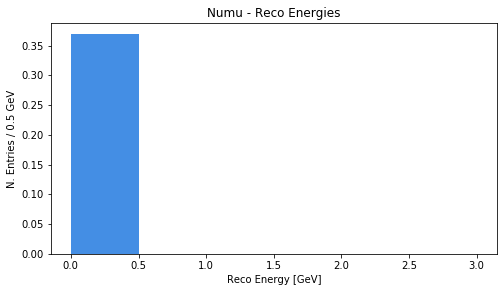

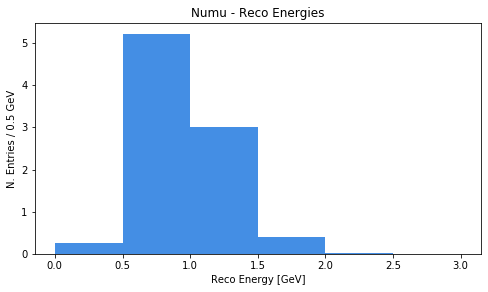

In [37]:
####Dirt 100% uncertainty

varss = [nue_dirt_vars_tot_run1, nue_dirt_vars_tot_run3]
weightss = [nue_dirt_weights_tot_run1, nue_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

nue_dirt_fig = plt.figure(figsize=(8, 7))
nue_dirt_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_dirt_ax1 = plt.subplot(nue_dirt_gs[0])

VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]"

nue_stacked_dirt = nue_dirt_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist_dirt = (nue_stacked_dirt[0][-1])

n_nue_tot_dirt = (nue_stacked_dirt[0])
print(n_nue_tot_dirt)

current_total_hist_dirt = (nue_stacked_dirt[0])
print('%.3f' % math.fsum(nue_stacked_dirt[0]))
print()


plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")

#####


nue_dirt_errs = (1*1)*(n_nue_tot_dirt*n_nue_tot_dirt)
nue_cov_mc_dirt[np.diag_indices_from(nue_cov_mc_dirt)]   = (nue_dirt_errs)
print("nue_cov_mc_dirt = ", np.diag(nue_cov_mc_dirt))


nue_dirt_exp_err = np.sqrt(np.diag(nue_cov_mc_dirt))
nue_dirt_frac_err = nue_dirt_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_dirt ", nue_dirt_errs )
print("nue_dirt_exp_err ", nue_dirt_exp_err)
print("nue_dirt_frac_err ", nue_dirt_frac_err)
print("")

#####################################################



varss = [numu_dirt_vars_tot_run1, numu_dirt_vars_tot_run3]
weightss = [numu_dirt_weights_tot_run1, numu_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

numu_dirt_fig = plt.figure(figsize=(8, 7))
numu_dirt_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_dirt_ax1 = plt.subplot(numu_dirt_gs[0])

VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reco Energy [GeV]" #NoCuts, PreCuts

numu_stacked_dirt = numu_dirt_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist_dirt = (numu_stacked_dirt[0][-1])

n_numu_tot_dirt = (numu_stacked_dirt[0])
print(n_numu_tot_dirt)

current_total_hist_dirt = (numu_stacked_dirt[0])
print('%.3f' % math.fsum(numu_stacked_dirt[0]))
print()


plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")

#####

numu_dirt_errs = (1*1)*(n_numu_tot_dirt*n_numu_tot_dirt)
numu_cov_mc_dirt[np.diag_indices_from(numu_cov_mc_dirt)]   = (numu_dirt_errs)
print("numu_cov_mc_dirt = ", np.diag(numu_cov_mc_dirt))

numu_dirt_exp_err = np.sqrt(np.diag(numu_cov_mc_dirt))
numu_dirt_frac_err = numu_dirt_exp_err/n_numu_tot_allsel
print("totalstat_numu_dirt ", numu_dirt_errs )
print("numu_dirt_exp_err ", numu_dirt_exp_err)
print("numu_dirt_frac_err ", numu_dirt_frac_err)
print("")

### Now need the systematic errors

In [38]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)
    nue_cov += (cov_nue_mc_ppfx + cov_nue_mc_genie + cov_nue_mc_reint)
    nue_cov += (cov_nue_mc_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
    numu_cov += (cov_numu_nue_ppfx + cov_numu_nue_genie + cov_numu_nue_reint)
    numu_cov += (cov_numu_nue_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3 )
    nue_cov += (cov_nue_mc_ppfx_run1 + cov_nue_mc_genie_run1 + cov_nue_mc_reint_run1 + cov_nue_mc_ppfx_run3 + cov_nue_mc_genie_run3 + cov_nue_mc_reint_run3)
    nue_cov += (cov_nue_mc_geo_run1 + cov_nue_mc_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3)
    numu_cov += (cov_numu_mc_geo_run1 +cov_numu_mc_geo_run3)
    numu_cov += (cov_numu_nue_ppfx_run1 + cov_nue_dirt_genie_run1 + cov_nue_dirt_reint_run1 + cov_nue_nue_ppfx_run3 + cov_numu_nue_genie_run3 + cov_numu_nue_reint_run3)
    numu_cov += (cov_numu_nue_geo_run1 + cov_nue_dirt_geo_run3)

In [39]:
if isCombined == False and isRun3 == False:
    nue_cov_genie_only = cov_nue_nue_genie + cov_nue_mc_genie
    
    np.savetxt("nue_cov_genie_only_energy_"+ending+".csv", 
           nue_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  

    numu_cov_genie_only = cov_numu_mc_genie + cov_numu_nue_genie
    
    np.savetxt("numu_cov_genie_only_energy_"+ending+".csv", 
           numu_cov_genie_only,
           delimiter =", ", 
           fmt ='% s') 

In [40]:
#only for combined
addNuWro = True

if (addNuWro == True):
    ending = "Jan19b"
    
    nue_cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_energy_nueonly_"+ending+".csv", header=None)
    nue_cov_nuwro = nue_cov_nuwro.values
    
    numu_cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_energy_numuonly_"+ending+".csv", header=None)
    numu_cov_nuwro = numu_cov_nuwro.values
    
    ending = "Jan19b_AddnuWro"

Sidenote for Unfolding

In [41]:
if (addNuWro == False):
    total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys + nue_cov_mc_POT + nue_cov_mc_dirt
elif (addNuWro == True):
    total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys + nue_cov_mc_POT + nue_cov_mc_dirt +  nue_cov_nuwro

#total_nue_cov_frac = np.nan_to_num(total_nue_cov / (n_nue_tot_allsel**2))
####################################
bins = np.arange(0, 3.5, 0.5)
print(bins)

total_nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot_allsel[i]*n_nue_tot_allsel[j] != 0:
            total_nue_frac_cov[i][j] = c/(n_nue_tot_allsel[i]*n_nue_tot_allsel[j])
            
print(total_nue_frac_cov)
print(len(total_nue_frac_cov))

#print(total_nue_cov)
print(np.diag(total_nue_cov))
print("")
#print(total_nue_cov_frac)
print(np.diag(total_nue_frac_cov))

##########################################
#bins = np.arange(1, 4.3, 0.3)
#print(bins)
total_nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_nue_cov)): 
        for j in range(len(total_nue_cov[i])): 

            if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
                total_nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
                
print("")
print(total_nue_cor)

[0.  0.5 1.  1.5 2.  2.5 3. ]
[[0.03738289391811001, 0.016218670452300736, 0.01074286670324814, 0.00914311901720559, 0.003854803048230457, -0.005869366665354525], [0.016218670452300736, 0.03787209167580664, 0.034556366984001316, 0.026256903372997346, 0.027584753357736125, 0.031046287044049176], [0.01074286670324814, 0.034556366984001316, 0.06875035409822162, 0.04110284511953108, 0.047895774327353195, 0.06374669256642167], [0.00914311901720559, 0.026256903372997346, 0.04110284511953108, 0.048809491762578316, 0.03814726011400063, 0.05081342150710535], [0.003854803048230457, 0.027584753357736125, 0.047895774327353195, 0.03814726011400063, 0.06819077524851551, 0.06646885196181303], [-0.005869366665354525, 0.031046287044049176, 0.06374669256642167, 0.05081342150710535, 0.06646885196181303, 0.1349129203039938]]
6
[ 64.43514767 501.76085341 166.43095127  16.54210214   2.77791264
   5.36424399]

[0.03738289 0.03787209 0.06875035 0.04880949 0.06819078 0.13491292]

[[0.9999999999999998, 0.431041

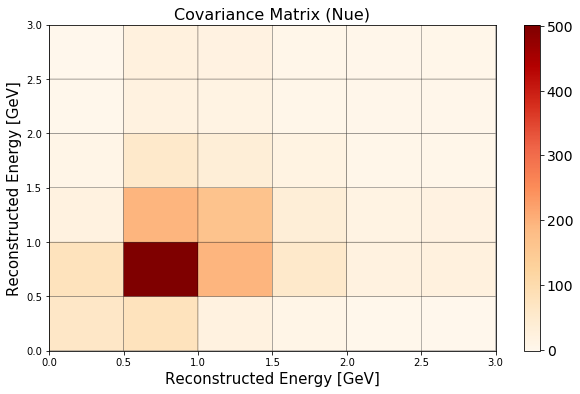

In [42]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reconstructed Energy [GeV]", fontsize=15)
plt.ylabel("Reconstructed Energy [GeV]", fontsize=15)

plt.title('Covariance Matrix (Nue)', fontsize=16)


plt.savefig("Nue_Full_Reco_Cov_"+ending+".svg", bbox_inches='tight')

plt.show()

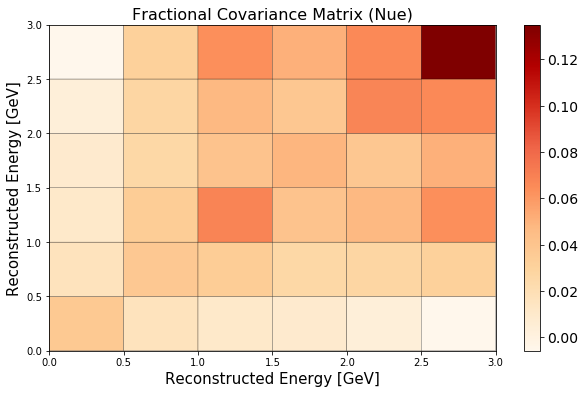

In [43]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_frac_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reconstructed Energy [GeV]", fontsize=15)
plt.ylabel("Reconstructed Energy [GeV]", fontsize=15)

plt.title('Fractional Covariance Matrix (Nue)', fontsize=16)

plt.savefig("Nue_Full_Reco_FracCov_"+ending+".svg", bbox_inches='tight')

plt.show()

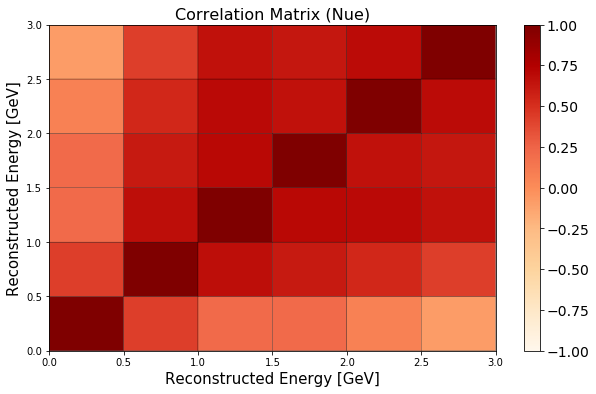

In [44]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Energy [GeV]", fontsize=15)
plt.ylabel("Reconstructed Energy [GeV]", fontsize=15)

plt.title('Correlation Matrix (Nue)', fontsize=16)

plt.savefig("Nue_Full_Reco_Cor_"+ending+".svg", bbox_inches='tight')

plt.show()

In [45]:
#print(total_nue_cov)
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')     

#---------------------------------------------------------

In [46]:
if (addNuWro == False):
    total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys + numu_cov_mc_POT + numu_cov_mc_dirt
elif (addNuWro == True):
    total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys + numu_cov_mc_POT + numu_cov_mc_dirt + numu_cov_nuwro

#total_numu_cov_frac = total_numu_cov / (n_numu_tot_allsel**2)
#################################

total_numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot_allsel[i]*n_numu_tot_allsel[j] != 0:
            total_numu_frac_cov[i][j] = c/(n_numu_tot_allsel[i]*n_numu_tot_allsel[j])
            
print(total_numu_frac_cov)


print(n_numu_tot_allsel**2)
print("")
print(np.diag(numu_cov))
print("")
print(np.diag(total_numu_cov))
print("")
print(np.diag(total_numu_frac_cov))

##########################################
#bins = np.arange(1, 4.3, 0.3)
total_numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_numu_cov)): 
        for j in range(len(total_numu_cov[i])): 
            
            if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
                total_numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))
                
print("")
print(total_numu_cor)

[[0.620821938803883, 0.07611656467589221, -0.016468332712822147, 0.01004109157218553, 0.040836986965977894, 0.021919959270747323], [0.07611656467589221, 0.08437399391835194, 0.018931216930711037, 0.02535351356939395, 0.02639069084512335, 0.022646714562887544], [-0.016468332712822147, 0.018931216930711037, 0.08836699465546033, 0.032768785388748924, 0.0282636552847377, 0.026627692562565076], [0.01004109157218553, 0.02535351356939395, 0.032768785388748924, 0.10062880351069957, 0.036550773681798134, 0.03560579214062255], [0.040836986965977894, 0.02639069084512335, 0.0282636552847377, 0.036550773681798134, 0.09735099872784317, 0.03216582273264646], [0.021919959270747323, 0.022646714562887544, 0.026627692562565076, 0.03560579214062255, 0.03216582273264646, 0.09571445861525482]]
[  1200.02298095 698531.64704494 668244.56842532 142714.10739944
  20539.79687609   9228.21624513]

[   44.58096426 14523.743975   18969.60283349  6009.65137208
   740.98214685   313.35892604]

[  745.00059364 58937.9

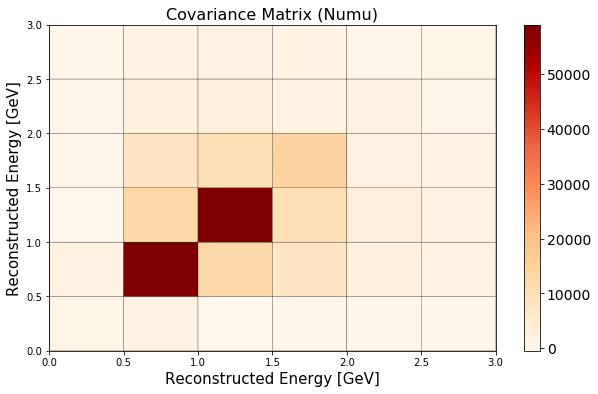

In [47]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Energy [GeV]", fontsize=15)
plt.ylabel("Reconstructed Energy [GeV]", fontsize=15)


plt.title('Covariance Matrix (Numu)', fontsize=16)

plt.savefig("Numu_Full_Reco_Cov_"+ending+".svg", bbox_inches='tight')

plt.show()

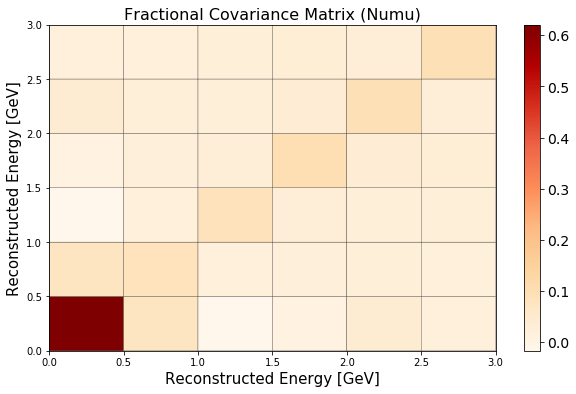

In [48]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_frac_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Energy [GeV]", fontsize=15)
plt.ylabel("Reconstructed Energy [GeV]", fontsize=15)

plt.title('Fractional Covariance Matrix (Numu)', fontsize=16)

plt.savefig("Numu_Full_Reco_FracCov_"+ending+".svg", bbox_inches='tight')

plt.show()

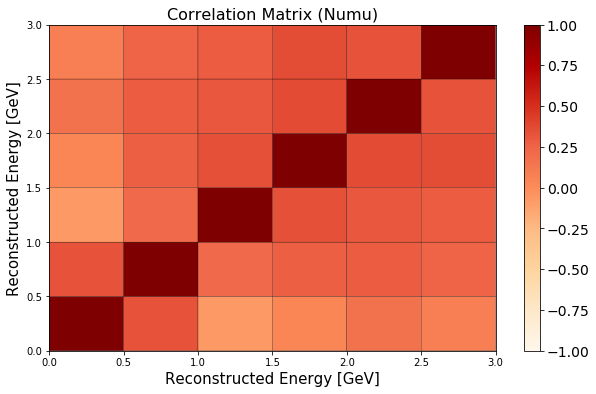

In [49]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Energy [GeV]", fontsize=15)
plt.ylabel("Reconstructed Energy [GeV]", fontsize=15)

plt.title('Correlation Matrix (Numu)', fontsize=16)

plt.savefig("Numu_Full_Reco_Cor_"+ending+".svg", bbox_inches='tight')

plt.show()

In [50]:
#print(type(total_numu_cov))
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')     

#---------------------------------------------------------

End note

In [51]:
print(n_nue_tot)

[22.75025931 77.65268931 35.89616102 11.09976876  4.46142678  3.40257977]


In [52]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys + nue_cov_mc_POT + nue_cov_mc_dirt)))
nue_exp_err_frac_sys = np.sqrt( np.diag((nue_cov)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_sys ", nue_exp_err_frac_sys)
nue_exp_err_frac_stat = np.sqrt( np.diag((nue_cov_mc_stat)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_stat ", nue_exp_err_frac_stat)
nue_exp_err_frac_detsys = np.sqrt( np.diag((nue_cov_mc_detsys)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_detsys ", nue_exp_err_frac_detsys)
nue_exp_err_frac_POT = np.sqrt( np.diag((nue_cov_mc_POT)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_POT ", nue_exp_err_frac_POT)
nue_exp_err_frac_dirt = np.sqrt( np.diag((nue_cov_mc_dirt)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_dirt ", nue_exp_err_frac_dirt)

#print("")
#print("")

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys + numu_cov_mc_POT + numu_cov_mc_dirt)))
numu_exp_err_frac_sys = np.sqrt( np.diag((numu_cov)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_sys ", numu_exp_err_frac_sys)
numu_exp_err_frac_stat = np.sqrt( np.diag((numu_cov_mc_stat)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_stat ", numu_exp_err_frac_stat)
numu_exp_err_frac_detsys = np.sqrt( np.diag((numu_cov_mc_detsys)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_detsys ", numu_exp_err_frac_detsys)
numu_exp_err_frac_POT = np.sqrt( np.diag((numu_cov_mc_POT)))/ n_numu_tot_allsel
#print("nue_exp_err_frac_POT ", nue_exp_err_frac_POT)
numu_exp_err_frac_dirt = np.sqrt( np.diag((numu_cov_mc_dirt)))/ n_numu_tot_allsel
#print("nue_exp_err_frac_dirt ", nue_exp_err_frac_dirt)

print("")
print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)                   #includes all errors
print("nue_frac_err ",nue_frac_err)
print("#########################################################")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot_allsel
print("")
print("numu_frac_err ", numu_frac_err)



nue_exp_err  [ 7.28649809 22.13144374 11.19060631  3.62478015  1.35280746  1.53418306]

nue_frac_err  [0.17550678 0.1922742  0.22744377 0.19689671 0.21195297 0.24330425]
#########################################################
numu_exp_err  [ 11.18715376 233.89457809 239.71016693 119.68682643  44.52193226
  29.71502012]

numu_frac_err  [0.32294222 0.27985116 0.29323698 0.31682023 0.31065327 0.30932651]


### Plots

In [53]:
nue_bin_edges = np.arange(0, 3.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)
print(nue_frac_err)

nue_allsel_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot_allsel-nue_exp_err))

[0.17550678 0.1922742  0.22744377 0.19689671 0.21195297 0.24330425]


<BarContainer object of 6 artists>

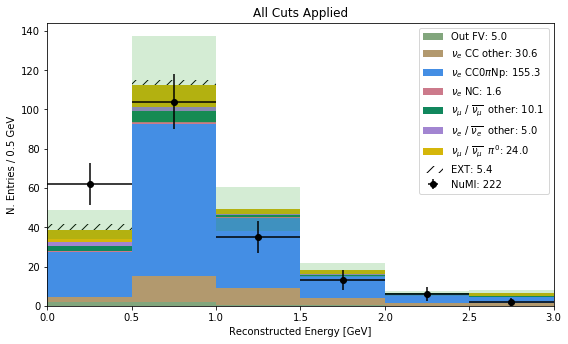

In [54]:
nue_allsel_fig

In [55]:
if isRun3 == False and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_run3_"+ending+".pdf")  
elif isCombined == True:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_comb_complete_"+ending+".svg", bbox_inches='tight')     

In [56]:
numu_bin_edges = np.arange(0, 3.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot_allsel
print(numu_frac_err)

numu_allsel_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot_allsel-numu_exp_err))

[0.32294222 0.27985116 0.29323698 0.31682023 0.31065327 0.30932651]


<BarContainer object of 6 artists>

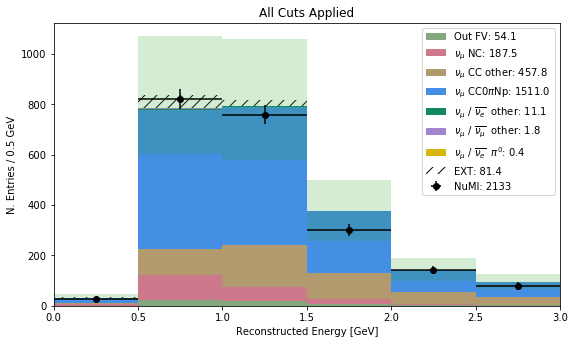

In [57]:
numu_allsel_fig

In [58]:
if isRun3 == False and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_run3_"+ending+".pdf")  
elif isCombined == True:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_comb_complete_"+ending+".svg", bbox_inches='tight') 

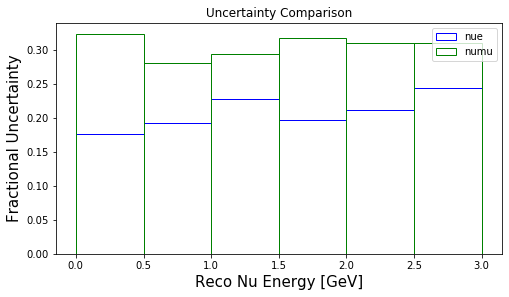

In [59]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(0, 3.5, 0.5)
#count = [1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]
count = np.arange(0.1, 3.0, 0.5)


sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
#sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('Reco Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1])

## For Blockwise Unfolding

Data (MC) Values

In [60]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [22.75025931 77.65268931 35.89616102 11.09976876  4.46142678  3.40257977]


In [61]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [ 22.82507154 550.18097095 547.82544905 242.73677535  87.59627616
  59.84530923]


In [62]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[ 22.75025931  77.65268931  35.89616102  11.09976876   4.46142678
   3.40257977  22.82507154 550.18097095 547.82544905 242.73677535
  87.59627616  59.84530923]
12


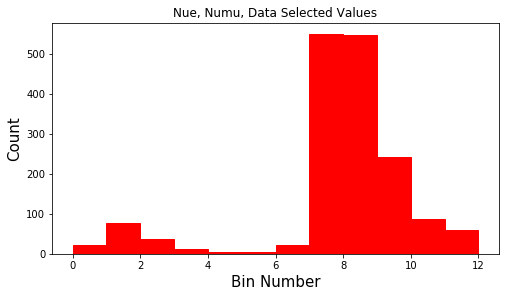

In [63]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [64]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    

Systematics

In [65]:
isCombined

True

In [66]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Jan19b"

In [67]:
if isRun3 == False and isCombined == False:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

    
elif isRun3 == True and isCombined == False:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################
    
elif isCombined == True:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run1 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run1 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run1 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run1 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run1 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run1 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run1 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run1 = nue_mc_geo_detvar_dict.to_dict('series')


    
#############################################################################################################
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run3 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run3 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run3 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run3 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run3 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run3 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run3 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run3 = nue_mc_geo_detvar_dict.to_dict('series')


In [68]:
if isRun3 == False and isCombined == False:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict = numu_nue_geo_detvar_dict.to_dict('series')
    
elif isRun3 == True and isCombined == False:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

    
        #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict = numu_nue_geo_detvar_dict.to_dict('series')
    
elif isCombined == True:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run1 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run1 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run1 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run1 = numu_mc_geo_detvar_dict.to_dict('series')


    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict_run1 = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run1 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict_run1 = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict_run1 = numu_nue_geo_detvar_dict.to_dict('series')
    
#################################################################################################################
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run3 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run3 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run3 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run3 = numu_mc_geo_detvar_dict.to_dict('series')


    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict_run3 = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run3 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict_run3 = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict_run3 = numu_nue_geo_detvar_dict.to_dict('series')

In [69]:
if isCombined == False:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    pup = [nue_nue_genie_detvar_dict, \
          nue_mc_genie_detvar_dict ]
    nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    ###########
    #############


    pup = [numu_mc_genie_detvar_dict,  \
          numu_nue_genie_detvar_dict]
    numu_genie_detvar_dict = combine_dicts(pup)[0]
    

In [70]:
##Why not just add all of them together to save time?
if isCombined == True:
    
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict
    
    pup = [nue_nue_ppfx_detvar_dict_run1, nue_nue_ppfx_detvar_dict_run3, \
          nue_mc_ppfx_detvar_dict_run1, nue_mc_ppfx_detvar_dict_run3 ]
    nue_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [nue_nue_genie_detvar_dict_run1, nue_nue_genie_detvar_dict_run3 , \
          nue_mc_genie_detvar_dict_run1, nue_mc_genie_detvar_dict_run3 ]
    nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_reint_detvar_dict_run1, nue_nue_reint_detvar_dict_run3, \
          nue_mc_reint_detvar_dict_run1, nue_mc_reint_detvar_dict_run3]
    nue_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_geo_detvar_dict_run1, nue_nue_geo_detvar_dict_run3, \
          nue_mc_geo_detvar_dict_run1, nue_mc_geo_detvar_dict_run3]
    nue_geo_detvar_dict = combine_dicts(pup)[0]
    
    ###########
    #############
    
    pup = [numu_mc_ppfx_detvar_dict_run1, numu_mc_ppfx_detvar_dict_run3, \
          numu_nue_ppfx_detvar_dict_run1, numu_nue_ppfx_detvar_dict_run3]
    numu_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [numu_mc_genie_detvar_dict_run1, numu_mc_genie_detvar_dict_run3, \
          numu_nue_genie_detvar_dict_run1, numu_nue_genie_detvar_dict_run3]
    numu_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_reint_detvar_dict_run1, numu_mc_reint_detvar_dict_run3, \
          numu_nue_reint_detvar_dict_run1, numu_nue_reint_detvar_dict_run3]
    numu_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_geo_detvar_dict_run1, numu_mc_geo_detvar_dict_run3, \
          numu_nue_geo_detvar_dict_run1, numu_nue_geo_detvar_dict_run3]
    numu_geo_detvar_dict = combine_dicts(pup)[0]


In [71]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

Mc dataframe

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[ 38.42405835 112.3799751   49.20164009  18.40955148   6.38258312
   6.30561569  32.32473607 778.57102787 790.40096921 375.58106132
 142.11330274  95.75469636]


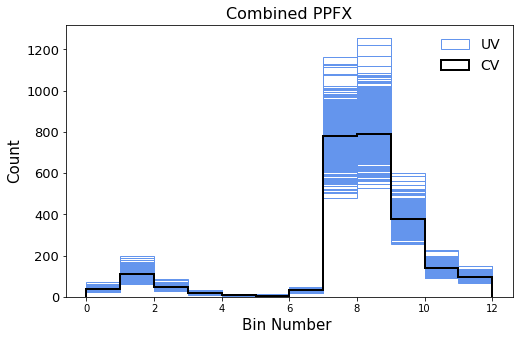

In [72]:
################
####ppfx########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 3.25, 0.5)
bins = np.arange(0, 3.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 13, 1)
bin_centers_full = np.arange(0.5, 12.5, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0:
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='white', alpha = 0)
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_ppfx_detvar_dict[variation], 
             linewidth=1, color='white', alpha = 0)
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_ppfx_detvar_dict[variation],
             linewidth=1, color='white', alpha = 0)
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_ppfx_detvar_dict[variation],
             linewidth=1, color='white', alpha = 0)
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_ppfx_detvar_dict['CV'], color='white', alpha = 0) 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_ppfx_detvar_dict['CV'], color='white', alpha = 0)

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Bin Number ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,50))

fig.savefig("batch_ppfx_mc_combSysErr_recoE_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [73]:

bins = bins_full
print(bins_full)


detsys_fullvars_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[38.42405835262093, 112.37997510004757, 49.20164008660623, 18.40955147536195, 6.3825831159284405, 6.30561569051531, 32.324736066162615, 778.5710278749466, 790.4009692072868, 375.58106131851673, 142.11330273747444, 95.75469635985792]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500


In [74]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_315008/1474398876.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_315008/1474398876.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


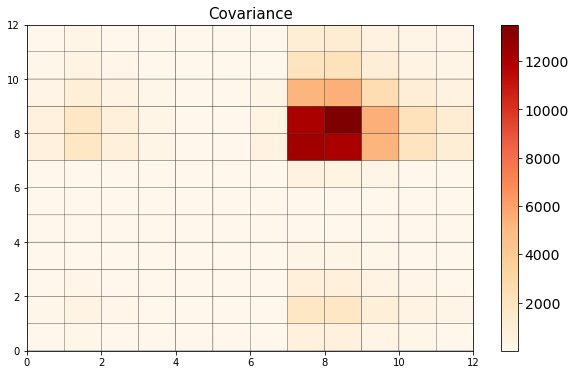

In [75]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[ 38.4240582  112.37997913  49.20164073  18.4095515    6.38258337
   6.30561578  32.32473607 778.57102787 790.40096921 375.58106132
 142.11330274  95.75469636]


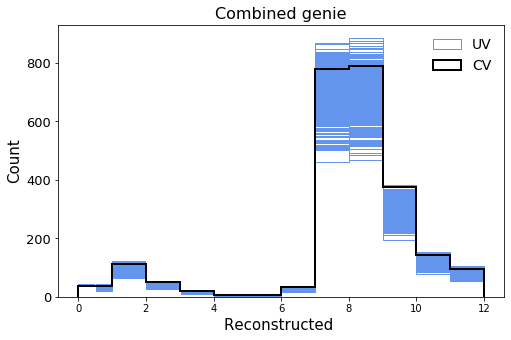

In [76]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 3.25, 0.5)
bins = np.arange(0, 3.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 13, 1)
bin_centers_full = np.arange(0.5, 12.5, 1)


fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [77]:

bins = bins_full
print(bins_full)


detsys_fullvars_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution 

In [78]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_315008/765668181.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_315008/765668181.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


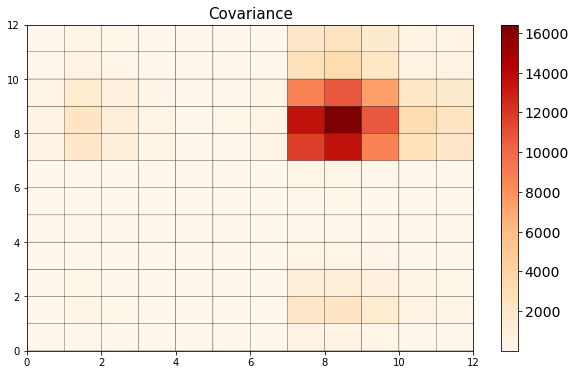

In [79]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[ 38.4240582  112.37997913  49.20164073  18.4095515    6.38258337
   6.30561578  32.32473607 778.57102787 790.40096921 375.58106132
 142.11330274  95.75469636]


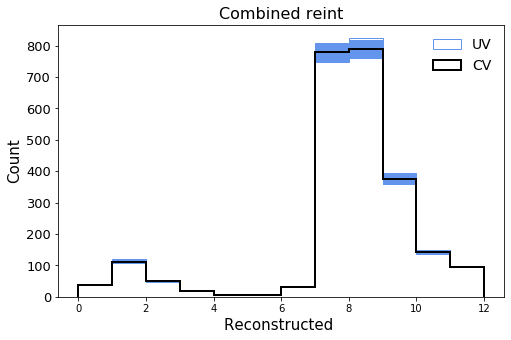

In [80]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 3.25, 0.5)
bins = np.arange(0, 3.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 13, 1)
bin_centers_full = np.arange(0.5, 12.5, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [81]:

bins = bins_full
print(bins_full)


detsys_fullvars_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution 

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [82]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_315008/2904819719.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_315008/2904819719.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


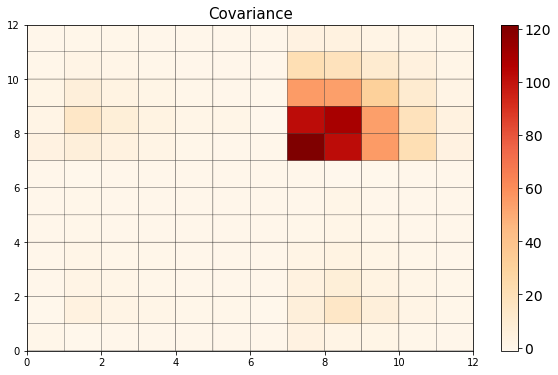

In [83]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[ 38.4240582  112.37997913  49.20164073  18.4095515    6.38258337
   6.30561578  32.32473607 778.57102787 790.40096921 375.58106132
 142.11330274  95.75469636]


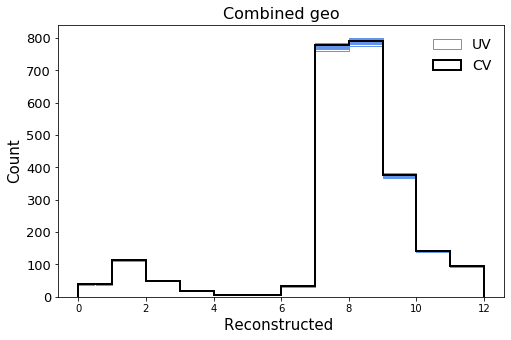

In [84]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 3.25, 0.5)
bins = np.arange(0, 3.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 13, 1)
bin_centers_full = np.arange(0.5, 12.5, 1)


fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [85]:

bins = bins_full
print(bins_full)


detsys_fullvars_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [86]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_315008/9538487.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_315008/9538487.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


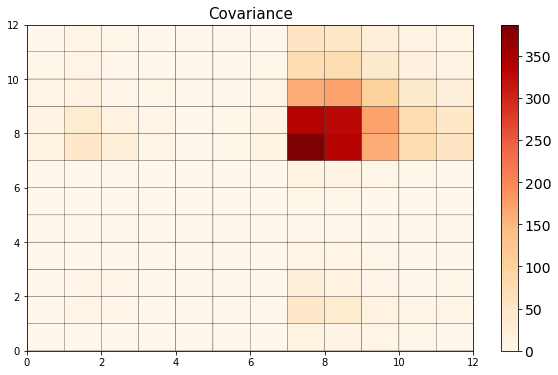

In [87]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

##geo will need different CV values for each one

Dirt dataframe

Nue Dataframe

Now add everything together

In [88]:
blockwise_cov_genie_only = np.array(detsys_dict_genie['cov'])
print(blockwise_cov_genie_only)
#GENIE NOT GEO

#print(detsys_dict_dirt_genie['cov'])

[[2.47967230e+01 8.28828269e+01 4.09838586e+01 1.25762594e+01
  4.35533006e+00 4.27936219e+00 1.77134623e+01 5.06375279e+02
  5.61123880e+02 3.39068945e+02 1.05926005e+02 8.18387178e+01]
 [8.28828269e+01 3.52501713e+02 1.82837949e+02 5.19203605e+01
  1.76662393e+01 1.95280639e+01 5.73165810e+01 2.00149918e+03
  2.35457323e+03 1.56249415e+03 4.70237423e+02 3.55740031e+02]
 [4.09838586e+01 1.82837949e+02 9.73618013e+01 2.71407944e+01
  9.20847022e+00 1.03845382e+01 2.83841689e+01 1.02765809e+03
  1.23459545e+03 8.38533828e+02 2.51433534e+02 1.90294889e+02]
 [1.25762594e+01 5.19203605e+01 2.71407944e+01 8.48350804e+00
  2.78815504e+00 3.00163183e+00 8.40225706e+00 3.01653068e+02
  3.64971239e+02 2.35701704e+02 7.29689923e+01 5.53040768e+01]
 [4.35533006e+00 1.76662393e+01 9.20847022e+00 2.78815504e+00
  1.00791070e+00 1.02626822e+00 2.91096745e+00 1.03221823e+02
  1.23713412e+02 7.91869772e+01 2.46322298e+01 1.86399930e+01]
 [4.27936219e+00 1.95280639e+01 1.03845382e+01 3.00163183e+00
  1

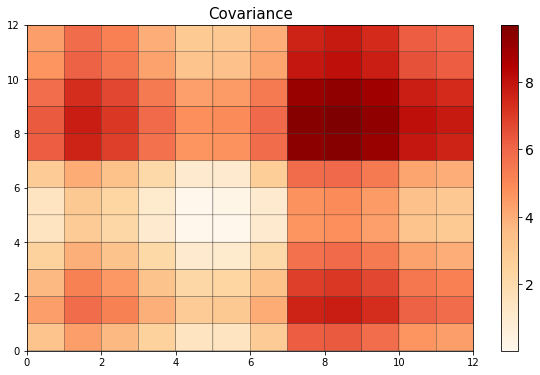

In [89]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, np.log(blockwise_cov_genie_only), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [90]:

if isCombined == False and isRun3 == False:
    np.savetxt("blockwise_cov_genie_only_energy_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  
elif isCombined == True:
    np.savetxt("blockwise_cov_genie_only_energy_comb_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  

In [91]:
sys_total_cov = np.array(detsys_dict_ppfx['cov']) + np.array(detsys_dict_genie['cov']) + np.array(detsys_dict_reint['cov']) + np.array(detsys_dict_geo['cov'])

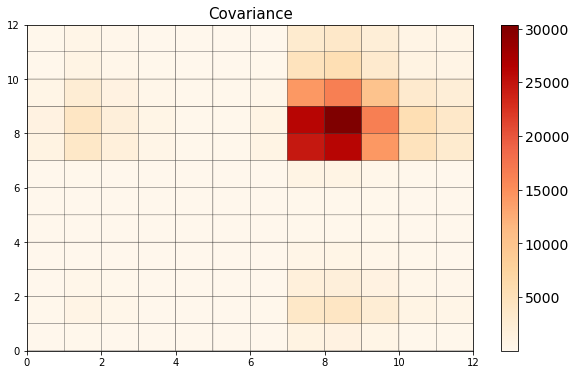

In [92]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, sys_total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



Add the stat uncertainties

In [98]:
#nue_cov_mc_stat and numu_cov_mc_stat
if data_uncertainty == False:
    nue_stats = np.diag(nue_cov_mc_stat)
    numu_stats = np.diag(numu_cov_mc_stat)

    nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)
elif data_uncertainty == True:
    nue_stats = (nue_bkg_exp_err_squared)
    numu_stats = (numu_bkg_exp_err_squared)

    nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[5.57038553e+00 8.66655139e+00 1.10353238e+00 8.76316977e-01
 9.23246430e-02 4.30664481e-01 6.22796376e+00 1.01631989e+02
 7.67304059e+01 3.44037334e+01 2.25191796e+01 7.77525029e+00]


In [99]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [100]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_stats

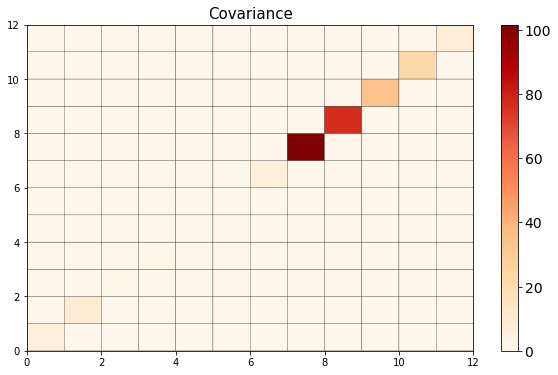

In [101]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



Add the detector systematics

In [102]:
#make sure these are the flat detsys
nue_detsys = np.diag(nue_cov_mc_detsys)
numu_detsys = np.diag(numu_cov_mc_detsys)

nue_numu_detsys = np.concatenate((np.array(nue_detsys), np.array(numu_detsys)), axis=0)

print(nue_numu_detsys)

[1.68935258e+01 1.29851770e+02 2.37262742e+01 3.32167243e+00
 3.99266934e-01 3.89695481e-01 6.79741017e+01 3.95676266e+04
 3.78520453e+04 8.08389790e+03 1.16345625e+03 5.22723081e+02]


In [103]:
nue_numu_cov_detsys   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [104]:
nue_numu_cov_detsys[np.diag_indices_from(nue_numu_cov_detsys)]   = nue_numu_detsys

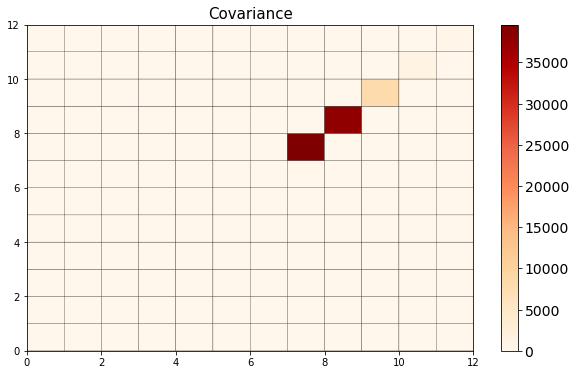

In [105]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_detsys, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


Add the POT counting uncertainty

In [106]:
nue_POT = np.diag(nue_cov_mc_POT)
numu_POT = np.diag(numu_cov_mc_POT)

nue_numu_POT = np.concatenate((np.array(nue_POT), np.array(numu_POT)), axis=0)

print(nue_numu_POT)

[6.89461312e-01 5.29953146e+00 9.68320547e-01 1.35564633e-01
 1.62949468e-02 1.59043151e-02 4.80009192e-01 2.79412659e+02
 2.67297827e+02 5.70856430e+01 8.21591875e+00 3.69128650e+00]


In [107]:
nue_numu_cov_POT   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [108]:
nue_numu_cov_POT[np.diag_indices_from(nue_numu_cov_POT)]   = nue_numu_POT

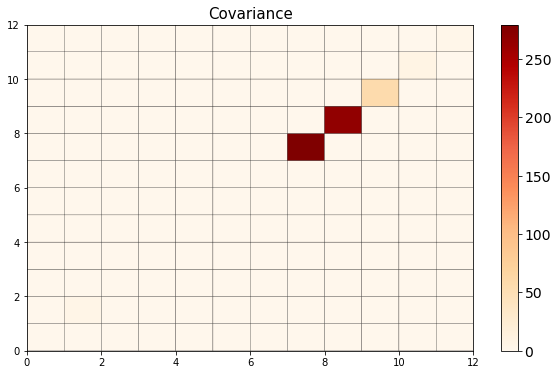

In [109]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_POT, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


Dirt Uncertainty

In [110]:
nue_dirt = np.diag(nue_cov_mc_dirt)
numu_dirt = np.diag(numu_cov_mc_dirt)

nue_numu_dirt = np.concatenate((np.array(nue_dirt), np.array(numu_dirt)), axis=0)

print(nue_numu_dirt)

[1.36355419e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.15364701e-02 2.72024436e+01
 9.01182873e+00 1.57840702e-01 6.14395646e-04 0.00000000e+00]


In [111]:
nue_numu_cov_dirt   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [112]:
nue_numu_cov_dirt[np.diag_indices_from(nue_numu_cov_dirt)]   = nue_numu_dirt

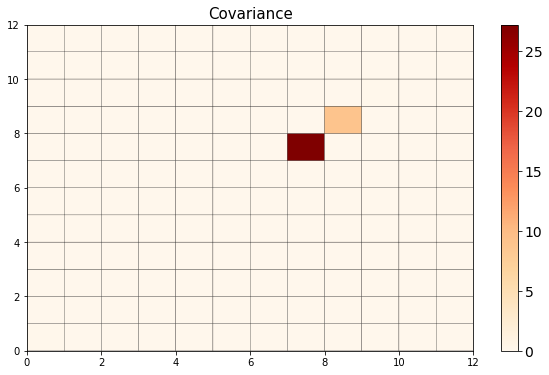

In [113]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_dirt, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

Add the nuwro unisim uncertainties

In [114]:
#combined only

addnNuWro = True

if addNuWro == True:
    ending = "Jan19b"
    
    cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_energy_comb_"+ending+".csv", header=None)
    cov_nuwro = cov_nuwro.values
    
    ending = "Jan19b_AddnuWro"

In [115]:
if addNuWro == False:
    total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys + nue_numu_cov_POT + nue_numu_cov_dirt
elif addNuWro == True:
    total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys + nue_numu_cov_POT + nue_numu_cov_dirt + cov_nuwro


print(total_cov)

[[ 1.07885940e+02  2.12443646e+02  7.99947911e+01  2.77043519e+01
   7.49155505e+00  5.48425548e+00  1.31319619e+02  1.37901852e+03
   1.08332105e+03  6.51408627e+02  2.50527340e+02  1.63838980e+02]
 [ 2.12443646e+02  9.44928883e+02  3.92736025e+02  1.24717061e+02
   4.12457173e+01  4.70698825e+01  6.17758842e+01  3.66871866e+03
   4.34809814e+03  2.55245686e+03  8.41055405e+02  5.93406902e+02]
 [ 7.99947911e+01  3.92736025e+02  2.49482897e+02  6.86334441e+01
   2.39225644e+01  3.10616960e+01 -9.51904005e+01  1.39387589e+03
   2.27369223e+03  1.28616622e+03  3.87636847e+02  2.90656975e+02]
 [ 2.77043519e+01  1.24717061e+02  6.86334441e+01  2.73346150e+01
   7.93440047e+00  9.92348836e+00 -2.55110415e+01  4.51419725e+02
   7.21011660e+02  3.95278206e+02  1.25412619e+02  9.28968979e+01]
 [ 7.49155505e+00  4.12457173e+01  2.39225644e+01  7.93440047e+00
   3.74742570e+00  3.97561509e+00 -1.75351677e+01  1.17964731e+02
   2.42813388e+02  1.29366094e+02  3.85500269e+01  2.94450398e+01]
 [ 5.

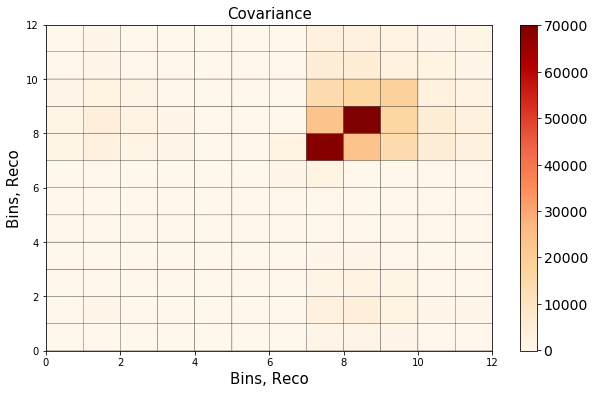

In [116]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 13, 1)
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()
if isCombined == True and data_uncertainty==False:
    fig.savefig("cov_input_recoE_comb_"+ending+".svg", bbox_inches='tight')


/tmp/ipykernel_315008/2329105017.py:5: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(total_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


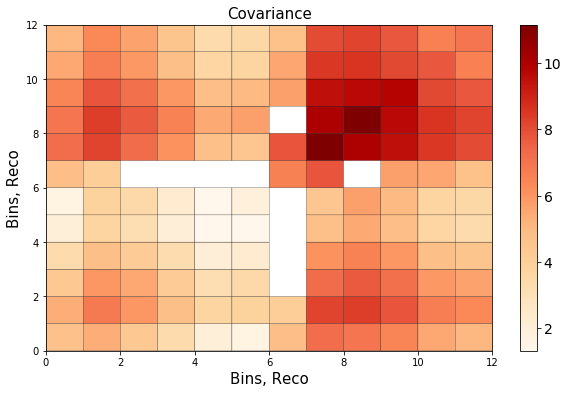

In [117]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 13, 1)
        
plt.pcolor(bins, bins, np.log(total_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [2]:
if data_uncertainty == True:
    ending = "Jan19b_Data"

NameError: name 'data_uncertainty' is not defined

In [119]:
if isRun3 == False and isCombined == False:
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_run3_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_comb_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 

Combined


In [120]:
ending

'Jan19b_Data'

In [121]:
# compute the corr matrix 

bins = np.arange(0, 13, 1)

total_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 
        
        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            total_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))


12


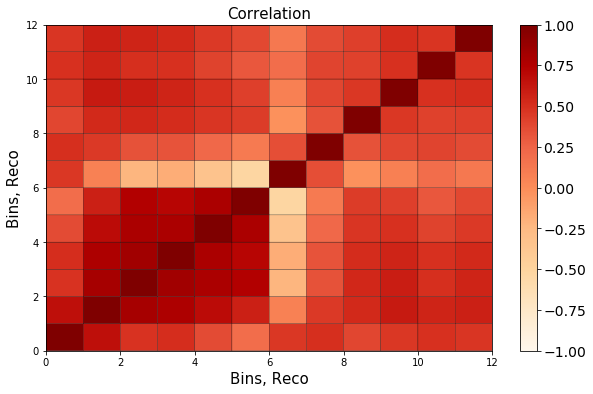

In [122]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


print(len(total_cor))

plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Correlation', fontsize=15)

plt.show()
fig.savefig("cor_input_recoE_comb_"+ending+".svg", bbox_inches='tight')


In [123]:
#Get the fractional covariance

#print(total_cov)
top_left_dummy = [ [0]*(6) for x in range(6) ]
top_right_dummy = [ [0]*(6) for x in range(6) ]
bot_left_dummy = [ [0]*(6) for x in range(6) ]
bot_right_dummy = [ [0]*(6) for x in range(6) ]
bot_dummy = np.zeros([6, 12])
top_dummy = np.zeros([6, 12])


#NUE ONLY
bot_left = total_cov[:6]
for i in range(len(bot_left)):
    bot_left_dummy[i] = bot_left[i][:6]
    
nue_errs_bot = np.array(bot_left_dummy)/((n_nue_tot_allsel*n_nue_tot_allsel))
    
#MIX   
bot_right = total_cov[:6]
for i in range(len(bot_right)):
    bot_right_dummy[i] = bot_right[i][6:]
    
mix_errs_bot = np.array(bot_right_dummy)/((n_nue_tot_allsel*n_numu_tot_allsel))

    
#MIX
top_left = total_cov[6:]
for i in range(len(top_left)):
    top_left_dummy[i] = top_left[i][:6]
    
mix_errs_top = np.array(top_left_dummy)/((n_nue_tot_allsel*n_numu_tot_allsel))

#NUMU ONLY
top_right = total_cov[6:]
for i in range(len(top_right)):
    top_right_dummy[i] = top_right[i][6:]
    
numu_errs_top = np.array(top_right_dummy)/((n_numu_tot_allsel*n_numu_tot_allsel))

print((n_nue_tot_allsel*n_numu_tot_allsel))
print(bot_right_dummy[1])
print(mix_errs_bot[1])
print(mix_errs_top[1])

##########################################

for a in range(len(nue_errs_bot)):
    bot_dummy[a] = list(np.concatenate(((nue_errs_bot[a]), mix_errs_bot[a]), axis=0))

    
for a in range(len(numu_errs_top)):
    top_dummy[a] = list(np.concatenate((mix_errs_top[a], ((numu_errs_top[a]))), axis=0))  
    

total_frac_cov = list(bot_dummy) + list(top_dummy)

[ 1438.2014969  96201.48700349 40220.4844029   6954.67210705
   914.73342804   605.7401651 ]
[  61.77588421 3668.71866489 4348.09813991 2552.45685844  841.05540532
  593.40690214]
[0.04295357 0.03813578 0.10810656 0.36701326 0.9194541  0.97963935]
[0.95884932 0.03813578 0.03465587 0.06490884 0.12896077 0.14079383]


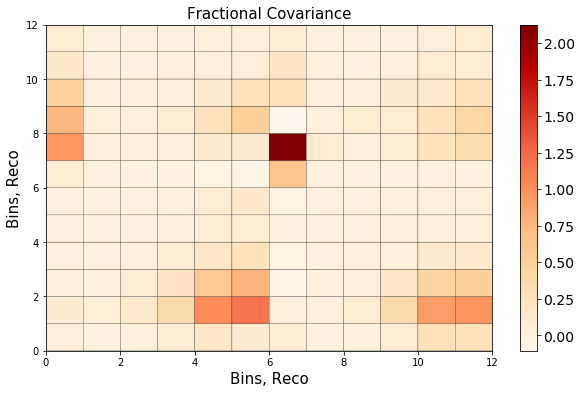

In [124]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, (total_frac_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Fractional Covariance', fontsize=15)

plt.show()
if isCombined == True:
    fig.savefig("fraccov_input_recoE_comb_"+ending+".svg", bbox_inches='tight')


In [125]:
ending

'Jan19b_Data'

### Smearing

In [53]:
isCombined

False

In [54]:
import csv

ending = "Jan19b"

if isRun3 == False and isCombined == False:
    with open('nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)
elif isCombined == True:
    with open('nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(nue_smearing[a])
    for b in range(len(nue_smearing[a])):
        nue_smearing[a][b] = float(nue_smearing[a][b])
    
print("nue_smearing = ", nue_smearing)

nue_smearing =  [[0.049174622581901146, 0.018487679660232195, 0.003018671362305153, 0.0015515264120772327, 0.00042831925029325235, 0.0005144236436556957], [0.009210239052132162, 0.11932641748452517, 0.048813928116630066, 0.012759645906538617, 0.00666808032356786, 0.006517947119849257], [0.0, 0.006583349132703248, 0.08262931460802762, 0.04682390944115766, 0.020632850329597847, 0.003865591053148756], [0.0, 0.0, 0.005239406352215436, 0.0568629308902934, 0.03171199673118315, 0.017180748901507788], [0.0, 0.0, 0.0, 0.003586113919679168, 0.04871579573638094, 0.020819777624466622], [0.0, 0.0, 0.0, 0.0, 0.005258472035377589, 0.04126399193496047]]


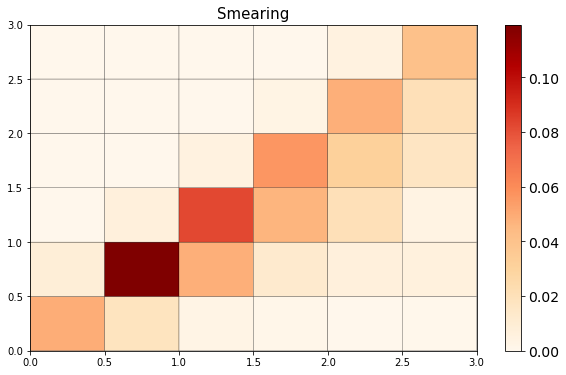

In [55]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.0, 3.5, 0.5)
        
plt.pcolor(bins, bins, nue_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [56]:
if isRun3 == False and isCombined == False:
    with open('numu_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)
elif isCombined == True:
    with open('numu_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)

for a in range(len(numu_smearing)):
    numu_smearing[a] = list(numu_smearing[a])
    for b in range(len(numu_smearing[a])):
        numu_smearing[a][b] = float(numu_smearing[a][b])
    
print("numu_smearing = ", numu_smearing)

numu_smearing =  [[0.0037292622111400144, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05449806994015747, 0.021273415088791322, 0.00047025011463630394, 0.00025495087012938325, 0.0, 0.0002399135896978873], [0.0017011344596090353, 0.0529463548236905, 0.003468684332192602, 0.0012147459539390477, 0.0002922890300568487, 0.00020051042282296706], [0.00012093885686839793, 0.01882266893149603, 0.010427347190454583, 0.0014407877317666332, 7.07681916391786e-05, 0.0001528729845917299], [2.5893153373875802e-05, 0.0007111983824631686, 0.011812758674984575, 0.001548963455822505, 4.4842844080627905e-05, 0.0], [0.0, 4.058229960172961e-05, 0.006040825395617819, 0.009060033120424908, 0.0029352297611576553, 0.00023311429245115962]]


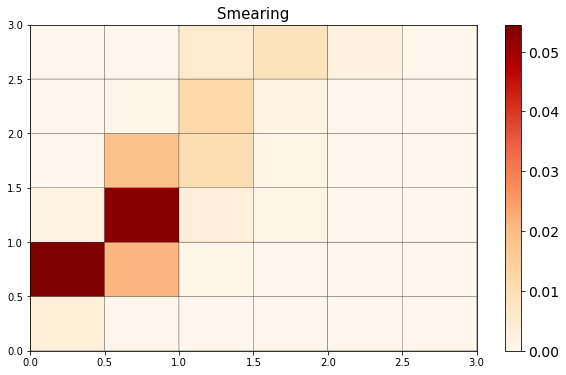

In [57]:
fig = plt.figure(figsize=(10, 6))

#bins = np.arange(1.0, 3.25, 0.25)
        
plt.pcolor(bins, bins, numu_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [58]:
#nue_smearing#

zeros = [0]*6

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(np.concatenate(((nue_smearing[a]), zeros), axis=0))

    
for a in range(len(numu_smearing)):
    numu_smearing[a] = list(np.concatenate((zeros, ((numu_smearing[a]))), axis=0))   

In [59]:
full_smear = nue_smearing + numu_smearing
print(nue_smearing)

[[0.049174622581901146, 0.018487679660232195, 0.003018671362305153, 0.0015515264120772327, 0.00042831925029325235, 0.0005144236436556957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.009210239052132162, 0.11932641748452517, 0.048813928116630066, 0.012759645906538617, 0.00666808032356786, 0.006517947119849257, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.006583349132703248, 0.08262931460802762, 0.04682390944115766, 0.020632850329597847, 0.003865591053148756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.005239406352215436, 0.0568629308902934, 0.03171199673118315, 0.017180748901507788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.003586113919679168, 0.04871579573638094, 0.020819777624466622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.005258472035377589, 0.04126399193496047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


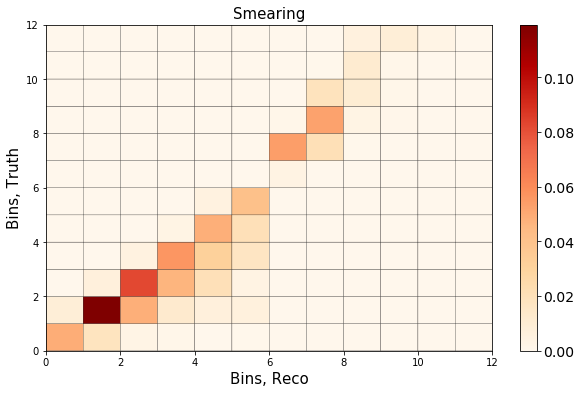

In [60]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 13, 1)
bin_centers_full = np.arange(0.25, 12.25, 1)
        
plt.pcolor(bins_full, bins_full, full_smear, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

fig.savefig("full_blockwise_smearing_input_"+ending+".svg",bbox_inches='tight' )

plt.show()

/tmp/ipykernel_5369/1659055918.py:6: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(bins_full, bins_full, np.log(full_smear), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


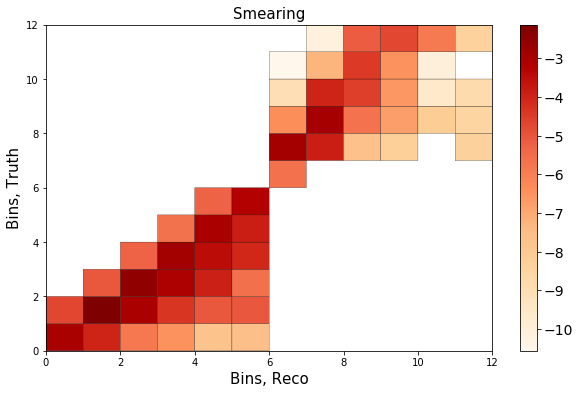

In [61]:
fig = plt.figure(figsize=(10, 6))

#bins_full = np.arange(0, 21, 1)
#bin_centers_full = np.arange(0.25, 20.25, 1)
        
plt.pcolor(bins_full, bins_full, np.log(full_smear), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

#fig.savefig("full_blockwise_smearing_input_"+ending+".svg",bbox_inches='tight' )

plt.show()

In [62]:
if isRun3 == False and isCombined == False:
    print("Run1")
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_blockwise_recoCut_run1_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_blockwise_recoCut_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')

Run1


In [63]:
with open("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv") as file:
            content = file.readlines()
            mcsig = content[0:]

            for i in range(12):
                mcsig[i]=mcsig[i].rstrip().rstrip(',')
                mcsig[i] = float(mcsig[i])
                
            print("MC Signal: ")
            print(mcsig)
                
with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
        content = file.readlines()
        prior_true = content[0:]

        for i in range(12):
            prior_true[i]=prior_true[i].rstrip().rstrip(',')
            prior_true[i] = float(prior_true[i])

        print("Prior Truth: ")
        print(prior_true)
        
print("------------------------------------------")
print("SMEAR x PRIOR_TRUE")
made_data_sig = np.dot(full_smear, prior_true)
print(made_data_sig)
print(sum(made_data_sig))
print("")
print("MC DATA SIGNAL")
print(mcsig)
print(sum(mcsig))
print("")
print("-------------------------------------------")
print("DIFFERENCES")
diffs = made_data_sig - mcsig

for i in range(12):
    print(diffs[i])

MC Signal: 
[22.750259305394675, 77.65268930872715, 35.8961610152653, 11.099768763345997, 4.461426784955719, 3.4025797729644194, 22.8250715394918, 550.1809709516049, 547.8254490504047, 242.73677535179243, 87.59627615548884, 59.84530922802149]
Prior Truth: 
[200.90155089602513, 508.2402269197106, 306.232262704156, 133.7775605028682, 67.25292842252685, 80.1395212850372, 5549.841605208183, 9509.799302516132, 5858.915960114153, 2824.280017714604, 1350.0165350084144, 2513.9433284989723]
------------------------------------------
SMEAR x PRIOR_TRUE
[ 20.47744582  80.12298386  36.61107944  12.72104108   5.42450851
   3.6605242   20.69681458 508.83990165 537.60241456 245.3129865
  80.55226223  65.91533318]
1617.9372955974034

MC DATA SIGNAL
[22.750259305394675, 77.65268930872715, 35.8961610152653, 11.099768763345997, 4.461426784955719, 3.4025797729644194, 22.8250715394918, 550.1809709516049, 547.8254490504047, 242.73677535179243, 87.59627615548884, 59.84530922802149]
1666.2727372274574

------

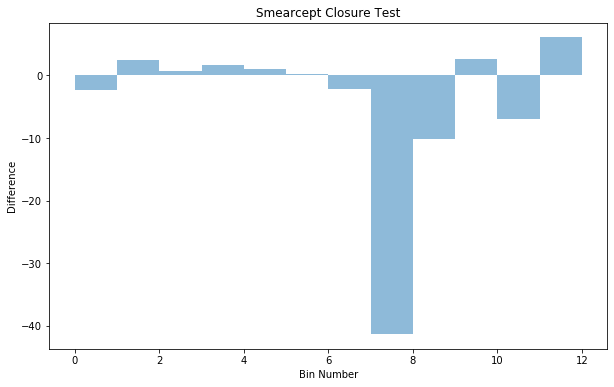

In [64]:
import random
import numpy
from matplotlib import pyplot

fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 13, 1)
count = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1]

pyplot.hist(count, bins, weights=diffs, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("Smearcept Closure Test")
pyplot.show()

fig.savefig("smearcept_closure_test_"+ending+".svg",bbox_inches='tight' )